### 1. Les packages

In [1]:
# Importer les packages nécessaires
import pandas as pd
import numpy as np
import matplotlib_inline 
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisation
sns.set_style("whitegrid")
plt.rcParams.update({ "font.size" : 10})

# Packages pour la préparations des données
# standarliser les données
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Importer les packages de CAH (classification ascendante hiérerchique) et de clustering
from sklearn.cluster import AgglomerativeClustering, KMeans
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

# 2. Importation des données

In [2]:
# importer les données
df_final = pd.read_csv(r"C:\Users\diarr\Downloads\P9\df_final.csv")

# Mettre la colonne "Zone" en colonne index
df_final = df_final.set_index("Zone")

# Lecture des données
print(df_final.shape)
df_final.head(5)

(172, 15)


Consommation-Personnelle (kg/pers/an)  Production-Totale  \
Zone                                                                       
Afghanistan                              3.573100e+08       1.160900e+10   
Afrique du Sud                           5.564200e+08       6.845500e+10   
Albanie                                  1.260490e+09       4.231000e+09   
Algérie                                  7.987100e+08       2.676300e+10   
Allemagne                                9.432400e+08       1.071600e+10   

                Importations-Totale  Exportations-Totale  Consommation-Totale  \
Zone                                                                            
Afghanistan            4.555000e+09         6.010000e+08         1.296800e+10   
Afrique du Sud         9.020000e+09         1.096800e+10         3.172600e+10   
Albanie                8.840000e+08         1.560000e+08         3.631000e+09   
Algérie                2.665000e+09         7.430000e+08         3.305600e+10   
Allemagne              2.665000e+09         8.525000e+08         6.142500e+09   

                Disponibilité-Intérieure-Totale  Production-Poulet  \
Zone                                                                 
Afghanistan                        1.513900e+10         28000000.0   
Afrique du Sud                     6.684000e+10         70000000.0   
Albanie                            4.879000e+09         13000000.0   
Algérie                            4.536500e+10        275000000.0   
Allemagne                          1.193650e+10         70000000.0   

                Importations-Poulet  Exportations-Poulet  Consommation-Poulet  \
Zone                                                                            
Afghanistan              29000000.0           -1530000.0           55000000.0   
Afrique du Sud           16000000.0            1000000.0           99500000.0   
Albanie                  38000000.0                  0.0           47000000.0   
Algérie                   2000000.0                  0.0          264000000.0   
Allemagne                16000000.0            1000000.0           99500000.0   

                Disponibilité-Intérieure-Poulet  Nbre habitant  \
Zone                                                             
Afghanistan                          57000000.0     36296113.0   
Afrique du Sud                      100000000.0     57009756.0   
Albanie                              47000000.0      2884169.0   
Algérie                             277000000.0     41389189.0   
Allemagne                           100000000.0      9757833.0   

                Évolution-pop (% en 2007-2017)  Stabilité-Politique  \
Zone                                                                  
Afghanistan                              33.93                -0.04   
Afrique du Sud                           16.06                -0.28   
Albanie                                  -4.94                 0.38   
Algérie                                  21.14                -0.92   
Allemagne                                 1.70                 0.59   

                PIB/habitant ($)  
Zone                              
Afghanistan               2096.1  
Afrique du Sud           13950.5  
Albanie                  12771.0  
Algérie                  11809.5  
Allemagne                53071.5

In [3]:
# Typage des données
df_info = df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, Afghanistan to Îles Salomon
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Consommation-Personnelle (kg/pers/an)  172 non-null    float64
 1   Production-Totale                      172 non-null    float64
 2   Importations-Totale                    172 non-null    float64
 3   Exportations-Totale                    172 non-null    float64
 4   Consommation-Totale                    172 non-null    float64
 5   Disponibilité-Intérieure-Totale        172 non-null    float64
 6   Production-Poulet                      172 non-null    float64
 7   Importations-Poulet                    172 non-null    float64
 8   Exportations-Poulet                    172 non-null    float64
 9   Consommation-Poulet                    172 non-null    float64
 10  Disponibilité-Intérieure-Poulet        172 non-null    float

# 3. Analyse exploratoire des données

## 3.1. Relation entre nos variables quantitatives

* Nous allons faire une analyse bivariée c'est à dire voir s'il exite des corrélations entre les différentes quantitatives,
* Pour celà nous allons les visualiser avec la matrix de corrélation.

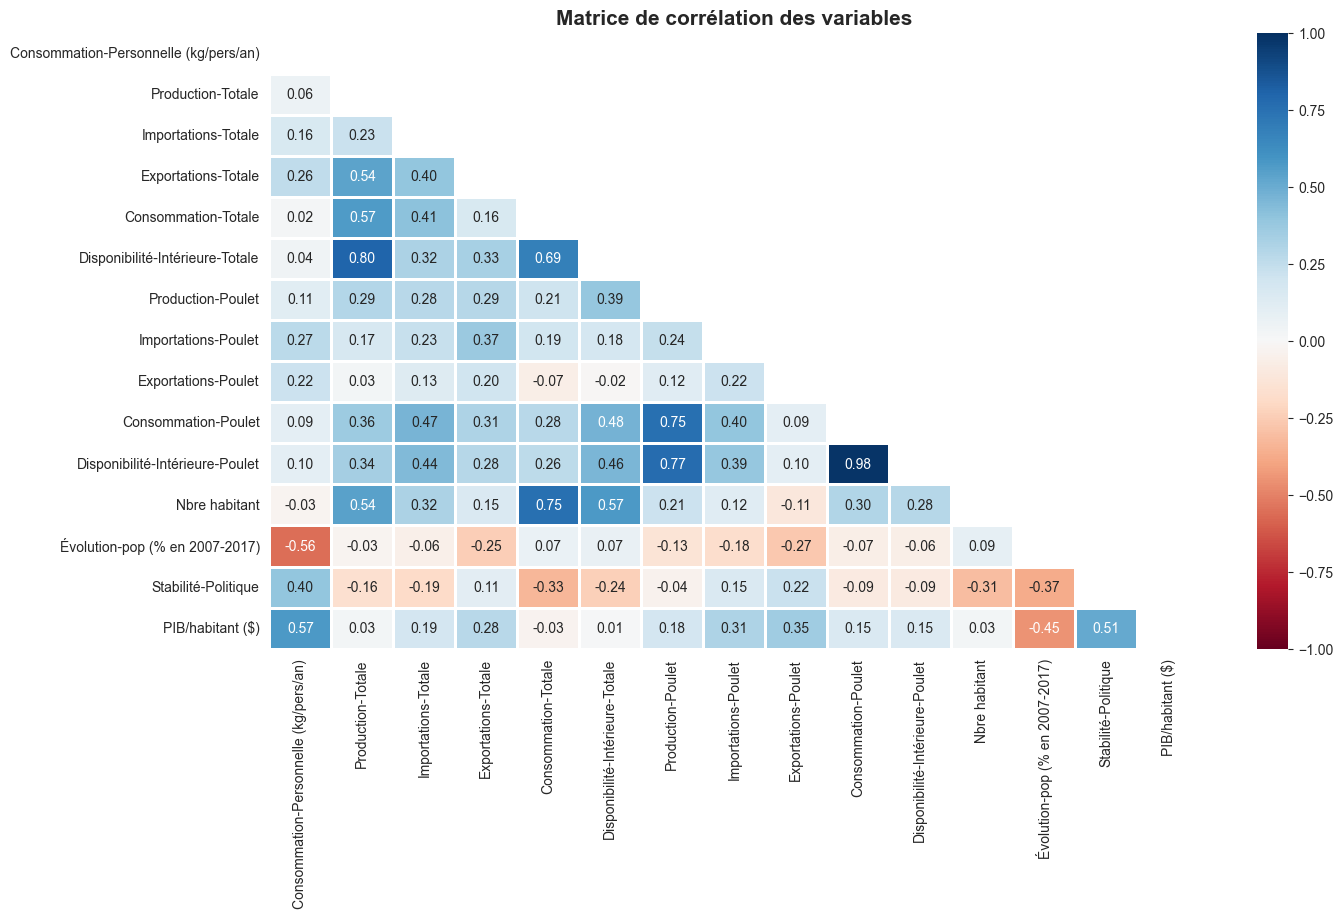

In [4]:
# Fonction pour visualiser la matix de corrélation
def plot_heatmap(data):
    cor_map = data.corr()
    #plt.rcParams.update({ "font.size" : 12})
    plt.figure(figsize = (15, 8))
    mask = np.triu(np.ones_like(cor_map, dtype=bool))
    sns.heatmap(cor_map, mask=mask, center=0, cmap='RdBu', 
                linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)
    plt.title("Matrice de corrélation des variables", fontsize=15, fontweight="bold")
    plt.show()

plot_heatmap(df_final)

* Nous observons de très forte corrélation entre différentes variables par exemple la consommation de poulet et la disponibilité intérieure de poulet qui sont fortement correlées avec la production de poulet, de même d'autres variables qui sont correlées entre elles.

***
Pour la suite de notre analyse, nous allons tester la classification ascendante hiérarchique, avec un dendrogramme comme visualisation. Ensuite utiliser la méthode des k-means, afin d’affiner l’analyse et comparer les résultats des deux méthodes de clustering. Réaliser une ACP afin de visualiser les résultats de l' analyse, comprendre les groupes, les liens entre les variables, les liens entre les individus...
* Avant tout nous allons faire du StandardScaler (ramener les données entre -1 et 1) pour centrer et réduire les données car le PCA et le Kmeans sont sensibles au outliers,
* Ensuite faire du PCA pour réduire les colonnes,ça nous permettra d'éliminer des variables moins informatifs qui ont tendance à induire les algorihmes d'apprentissage en erreurs.
* Et enfin de la Classification Ascendante Hiérarchique (CAH) et du K-means pour grouper les individus c'est à dire les Zone (Pays).

## 3.2. Appliquer la CAH (Classification Ascendante Hiérarchique)

* Le clustering ou regroupement hiérarchique consiste à créer une arborescence de cluster pour représenter les données. Au sein de cet arbre, chaque groupe ou  » noeud  » est lié à deux groupes successeurs ou davantage.

* Les groupes sont imbriqués entre eux et organisés sous la forme d’un arbre. Chaque noeud de l’arborescence contient un groupe de données similaires, et les noeuds sont regroupés en fonction de leurs similitudes.

* Les groupes d’un niveau rejoignent les groupes du niveau supérieur, toujours en fonction de leurs similitudes. Le processus se poursuit jusqu’à ce que tous les noeuds soient intégrés à l’arborescence.Le nombre total de clusters n’est pas prédéterminé avant la création du graphique.

In [5]:
# faire une copie des données 
df_CAH = df_final.copy()

# Standardiser (center et réduire nos données)
scaler_CAH = StandardScaler()
X_scaled_CAH = scaler_CAH.fit_transform(df_CAH)
X_scaled_CAH

# Extraire les valeurs
X_CAH = df_CAH.values
# extraire les colonnes
features_CAH = df_CAH.columns
#print(X_CAH)
print(X_scaled_CAH)

[[-1.67530629e+00 -9.50287909e-02  3.39522427e-01 ...  1.48361953e+00
   2.02943309e-03 -1.00404779e+00]
 [-6.80355596e-01  3.77180134e+00  1.53096147e+00 ...  1.14820671e-01
  -2.86849870e-01 -2.32014771e-01]
 [ 2.83787520e+00 -5.96901793e-01 -6.40045930e-01 ... -1.49372863e+00
   5.07568213e-01 -3.08831222e-01]
 ...
 [ 1.48813821e+00 -1.55773246e-01 -1.64804512e-01 ... -4.91832207e-01
   3.99238475e-01  2.76146927e+00]
 [-1.65301971e+00  2.66364017e+00 -8.42189376e-02 ...  1.32736045e+00
  -1.97197914e+00 -1.01108794e+00]
 [-1.63816732e-01 -8.12670451e-01 -8.42844064e-01 ...  1.12437685e+00
   2.90908736e-01 -9.69595983e-01]]


* On obtient le format array pour le X_scaled_CAH et non le format dataframe,
* Maintenant que nos données sont centrés et réduit, on peut appliquer les algorithmes.
* Le Dendrogramme est donc le type de diagramme en arborescence que l’on utilise pour présenter le clustering hiérarchique, à savoir les relations entre des ensembles de données similaires.

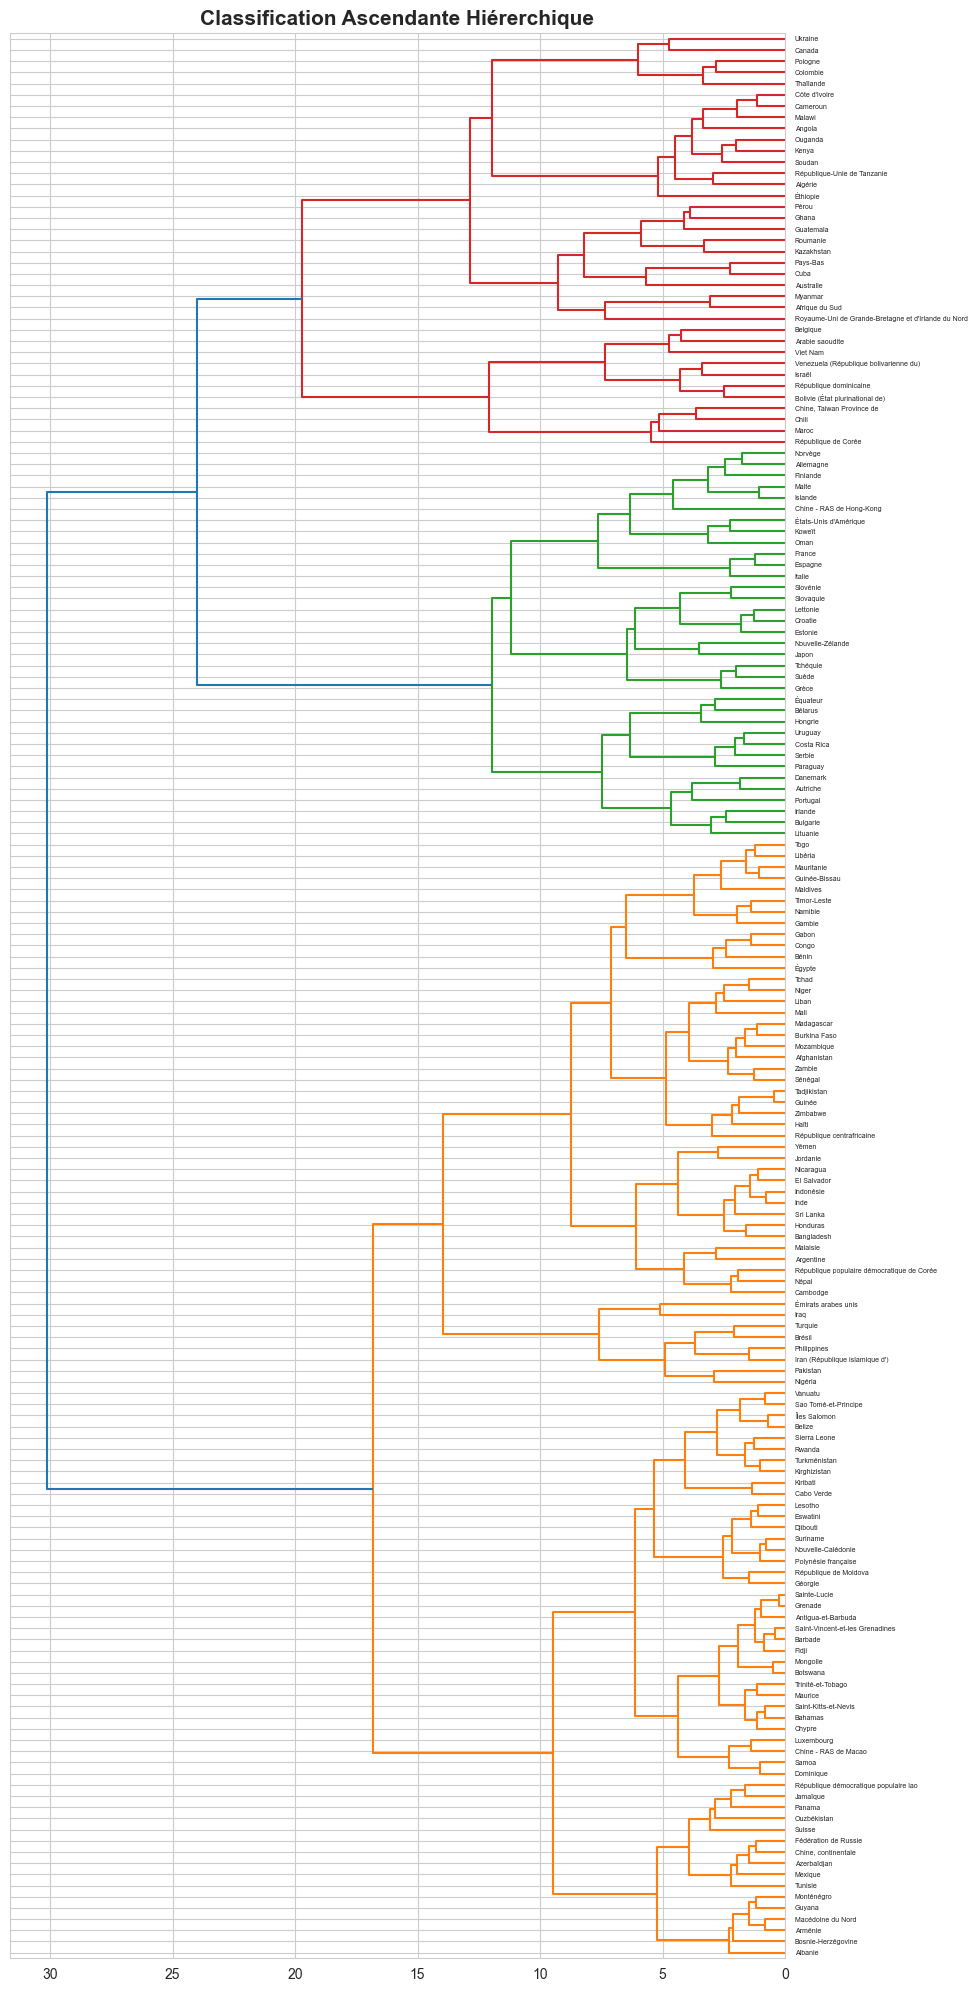

In [6]:
# generer le dendrogramme en utilisant sch puis l'afficher
plt.figure(figsize = (10, 25))
dendrogram = sch.dendrogram(sch.linkage(X_scaled_CAH, method = 'ward'), labels = df_CAH.index, orientation = "left")
plt.title("Classification Ascendante Hiérerchique", fontsize = 15, fontweight ="bold")
plt.show()

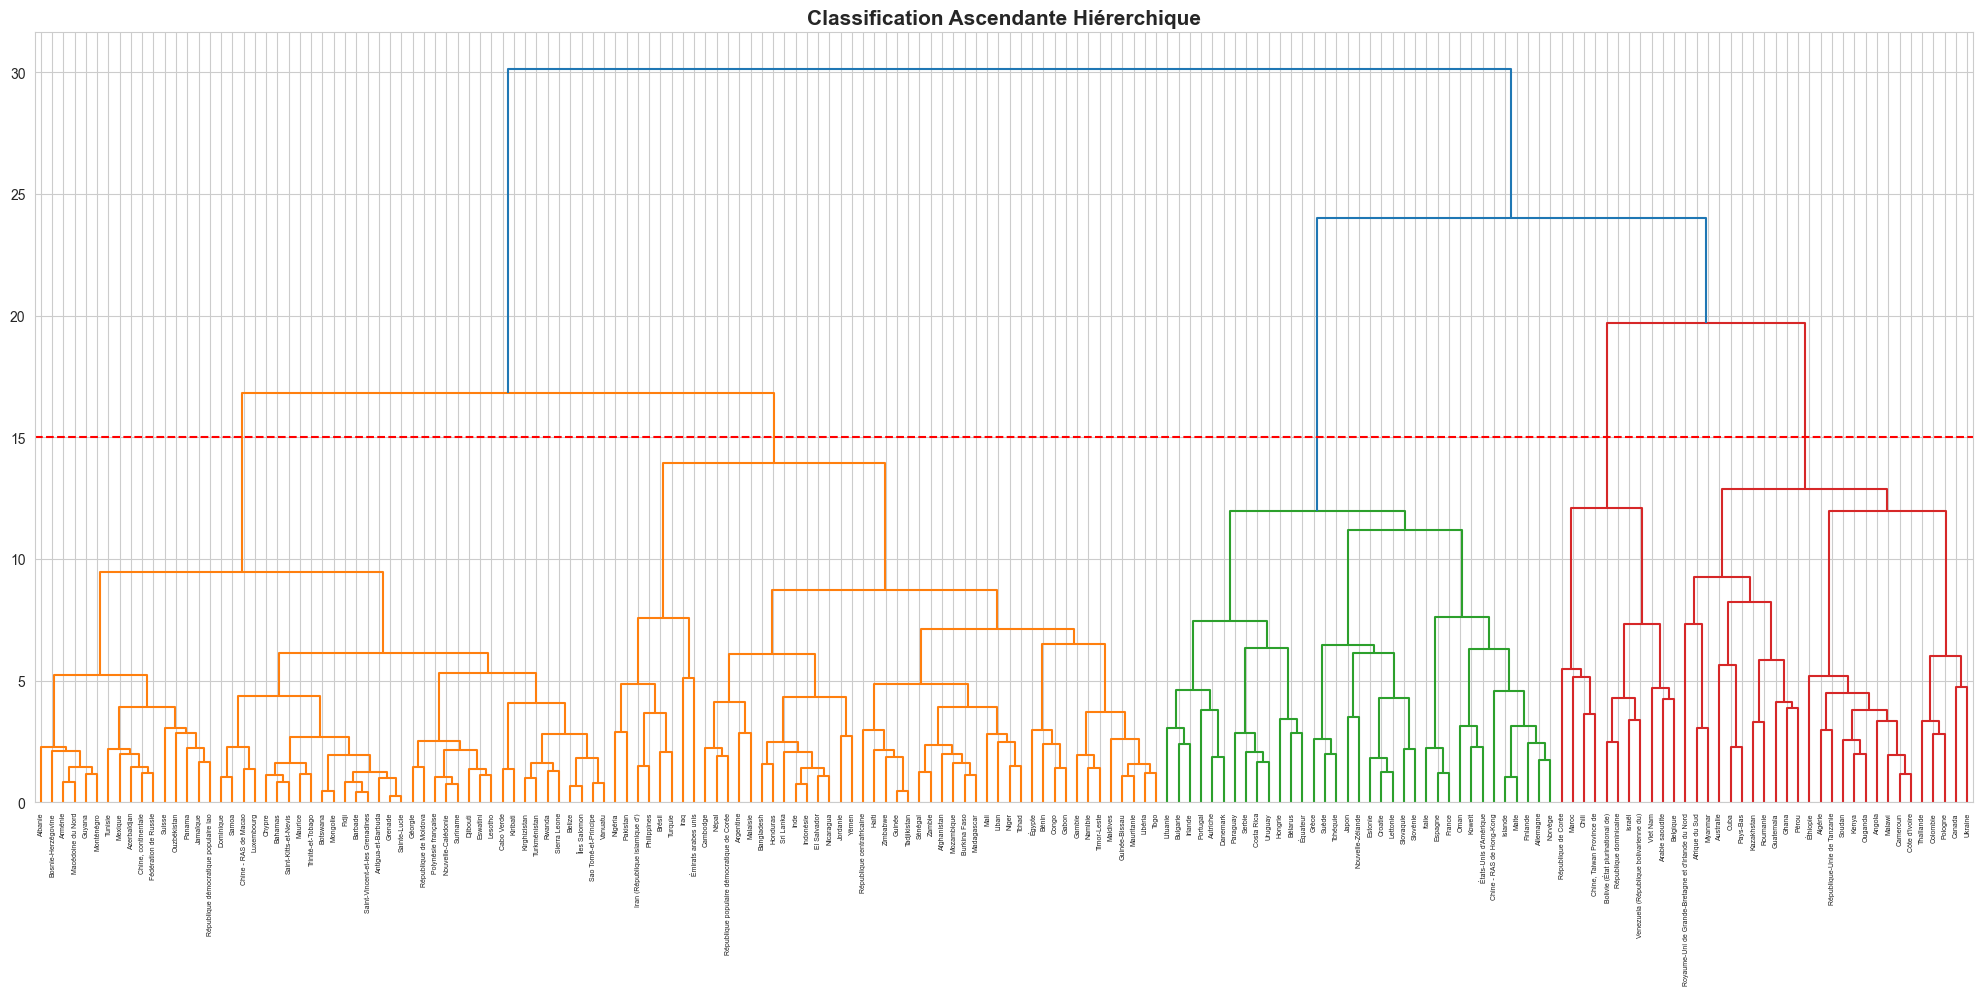

In [7]:
# generer le dendrogramme et dessiner la droite qui determine les clusters.
plt.figure(figsize = (25, 10))
dendrogram = sch.dendrogram(sch.linkage(X_scaled_CAH, method ='ward'), labels = df_CAH.index)
plt.axhline(y = 15, color ='r', linestyle='--')
plt.title("Classification Ascendante Hiérerchique", fontsize = 15, fontweight ="bold")
plt.show()

* J'ai tracé une droite pour déterminer le nombre de cluster, nous obtenons le nombre de cluster égal à 5 clusters.
* On peut utiliser AgglomerativeClustering pour déterminer le nombre de cluster 
***
* On pourrait tracer une droite à partir du dendrogramme (droite horizontale) et doit passer par les bras les plus long (dans ce cas on obtient deux (2) clusters), 
* Vue la quantité de données qu'on a, nous avons choisi 5 clusters.

In [8]:
# Instanciation du nombre de cluster
agg_clustering = AgglomerativeClustering(n_clusters = 5)

# Appliquer l'algorithme sur les données après instanciation
# agg_cluster = agg_clustering.fit_predict(X_scaled_CAH)
agg_cluster = agg_clustering.fit(X_scaled_CAH)
print(agg_cluster)

AgglomerativeClustering(n_clusters=5)


In [9]:
# Ajouter une nouvelle colonne pour leslabels que j'ai obtenu
# df_CAH["Label"] = agg_cluster
#df_CAH["Label"] = agg_cluster.labels_
#df_CAH.head(3)

# Ajouter le numéro de cluster aux données originales
df_CAH_label = pd.DataFrame(X_scaled_CAH, columns = df_CAH.columns, index = df_CAH.index)
df_CAH_label["Cluster_CAH"] = agg_cluster.labels_

df_CAH_label.head(3)

Consommation-Personnelle (kg/pers/an)  Production-Totale  \
Zone                                                                       
Afghanistan                                 -1.675306          -0.095029   
Afrique du Sud                              -0.680356           3.771801   
Albanie                                      2.837875          -0.596902   

                Importations-Totale  Exportations-Totale  Consommation-Totale  \
Zone                                                                            
Afghanistan                0.339522            -0.460188             0.540710   
Afrique du Sud             1.530961             2.734954             2.611705   
Albanie                   -0.640046            -0.597338            -0.490150   

                Disponibilité-Intérieure-Totale  Production-Poulet  \
Zone                                                                 
Afghanistan                            0.106012          -0.491109   
Afrique du Sud                         3.676665          -0.239083   
Albanie                               -0.602580          -0.581118   

                Importations-Poulet  Exportations-Poulet  Consommation-Poulet  \
Zone                                                                            
Afghanistan               -0.054194            -0.570916            -0.457214   
Afrique du Sud            -0.360197            -0.187598            -0.162182   
Albanie                    0.157654            -0.339107            -0.510253   

                Disponibilité-Intérieure-Poulet  Nbre habitant  \
Zone                                                             
Afghanistan                           -0.452495       1.441812   
Afrique du Sud                        -0.169240       2.772896   
Albanie                               -0.518368      -0.705281   

                Évolution-pop (% en 2007-2017)  Stabilité-Politique  \
Zone                                                                  
Afghanistan                           1.483620             0.002029   
Afrique du Sud                        0.114821            -0.286850   
Albanie                              -1.493729             0.507568   

                PIB/habitant ($)  Cluster_CAH  
Zone                                           
Afghanistan            -1.004048            0  
Afrique du Sud         -0.232015            1  
Albanie                -0.308831            4

In [10]:
# La taille des clusters
cluster_CAH = df_CAH_label["Cluster_CAH"].value_counts()
cluster_CAH

4    51
0    49
2    35
1    26
3    11
Name: Cluster_CAH, dtype: int64

In [11]:
# grouper par Label avec la median
# df_agg = df.groupby("Label").mean().round(0).reset_index()
df_agg = df_CAH_label.groupby("Cluster_CAH").mean().reset_index()
df_agg

Cluster_CAH  Consommation-Personnelle (kg/pers/an)  Production-Totale  \
0            0                              -0.823697          -0.274856   
1            1                               0.114387           1.512494   
2            2                               0.876761           0.110550   
3            3                               0.106607           0.437003   
4            4                               0.108388          -0.677121   

   Importations-Totale  Exportations-Totale  Consommation-Totale  \
0             0.172655            -0.276285            -0.110244   
1             0.481963             0.477959             1.757441   
2             0.166122             0.806184            -0.304180   
3             0.514424             0.039270             0.434098   
4            -0.636551            -0.539949            -0.674908   

   Disponibilité-Intérieure-Totale  Production-Poulet  Importations-Poulet  \
0                        -0.210315          -0.261065            -0.181975   
1                         1.544716          -0.075451             0.359544   
2                        -0.148148           0.096266             0.427341   
3                         0.973208           3.193273             0.487196   
4                        -0.693673          -0.465518            -0.406812   

   Exportations-Poulet  Consommation-Poulet  Disponibilité-Intérieure-Poulet  \
0            -0.235215            -0.143307                        -0.135094   
1            -0.202807             0.272715                         0.217638   
2             0.903266             0.048744                         0.046259   
3             0.184288             2.388226                         2.450715   
4            -0.330254            -0.549903                        -0.541488   

   Nbre habitant  Évolution-pop (% en 2007-2017)  Stabilité-Politique  \
0      -0.015099                        0.790083            -0.726801   
1       1.375999                        0.209330            -0.487769   
2      -0.193973                       -0.831356             0.872794   
3       0.525776                       -0.138439            -0.153353   
4      -0.667267                       -0.265419             0.381066   

   PIB/habitant ($)  
0         -0.644508  
1         -0.179676  
2          1.273280  
3          0.456654  
4         -0.261481

In [12]:
# faire la colonne "zone" en index
#df_agg_label = df_agg.set_index("Cluster_CAH")

In [13]:
# faire une boucle for pour afficher les différents zone pour voir quel cluster ils appartiennent
for i in range(5):
    print(f'Cluster_CAH {i}')
    print(df_CAH_label[df_CAH_label.Cluster_CAH == i].index.tolist())
    print()

Cluster_CAH 0
['Afghanistan', 'Argentine', 'Bangladesh', 'Brésil', 'Burkina Faso', 'Bénin', 'Cambodge', 'Congo', 'El Salvador', 'Gabon', 'Gambie', 'Guinée', 'Guinée-Bissau', 'Haïti', 'Honduras', 'Inde', 'Indonésie', "Iran (République islamique d')", 'Iraq', 'Jordanie', 'Liban', 'Libéria', 'Madagascar', 'Malaisie', 'Maldives', 'Mali', 'Mauritanie', 'Mozambique', 'Namibie', 'Nicaragua', 'Niger', 'Nigéria', 'Népal', 'Pakistan', 'Philippines', 'République centrafricaine', 'République populaire démocratique de Corée', 'Sri Lanka', 'Sénégal', 'Tadjikistan', 'Tchad', 'Timor-Leste', 'Togo', 'Turquie', 'Yémen', 'Zambie', 'Zimbabwe', 'Égypte', 'Émirats arabes unis']

Cluster_CAH 1
['Afrique du Sud', 'Algérie', 'Angola', 'Australie', 'Cameroun', 'Canada', 'Colombie', 'Cuba', "Côte d'Ivoire", 'Ghana', 'Guatemala', 'Kazakhstan', 'Kenya', 'Malawi', 'Myanmar', 'Ouganda', 'Pays-Bas', 'Pologne', 'Pérou', 'Roumanie', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'République-Unie de Tanzanie', '

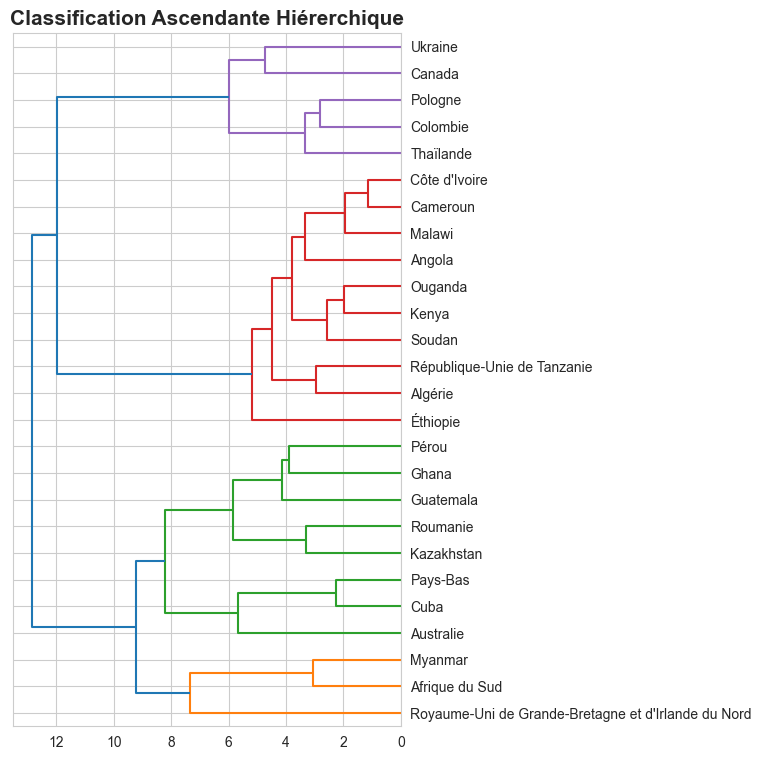

In [14]:
# Visualiser un des groupes de clusters avec le dendrogramme 
plt.figure(figsize = (5, 9))
dendrogram = sch.dendrogram(sch.linkage(df_CAH_label[df_CAH_label["Cluster_CAH"] == 1], method = 'ward'), labels = (df_CAH_label[df_CAH_label["Cluster_CAH"] == 1]).index, orientation = "left")
# plt.axhline(y = 40, color ='r', linestyle='--')
plt.title("Classification Ascendante Hiérerchique", fontsize = 15, fontweight = "bold")
plt.show()

* Maintenant pour visualiser ces données (colonnes), je vais utilser l'ACP.
* Nous avons 15 colonnes et on veut réduire sa en deux dimensions, et c'est cette réponse que va nous apporter l'ACP.

### 3.2.1. Interprétation des clusters avec la CAH

In [15]:
df_agg

Cluster_CAH  Consommation-Personnelle (kg/pers/an)  Production-Totale  \
0            0                              -0.823697          -0.274856   
1            1                               0.114387           1.512494   
2            2                               0.876761           0.110550   
3            3                               0.106607           0.437003   
4            4                               0.108388          -0.677121   

   Importations-Totale  Exportations-Totale  Consommation-Totale  \
0             0.172655            -0.276285            -0.110244   
1             0.481963             0.477959             1.757441   
2             0.166122             0.806184            -0.304180   
3             0.514424             0.039270             0.434098   
4            -0.636551            -0.539949            -0.674908   

   Disponibilité-Intérieure-Totale  Production-Poulet  Importations-Poulet  \
0                        -0.210315          -0.261065            -0.181975   
1                         1.544716          -0.075451             0.359544   
2                        -0.148148           0.096266             0.427341   
3                         0.973208           3.193273             0.487196   
4                        -0.693673          -0.465518            -0.406812   

   Exportations-Poulet  Consommation-Poulet  Disponibilité-Intérieure-Poulet  \
0            -0.235215            -0.143307                        -0.135094   
1            -0.202807             0.272715                         0.217638   
2             0.903266             0.048744                         0.046259   
3             0.184288             2.388226                         2.450715   
4            -0.330254            -0.549903                        -0.541488   

   Nbre habitant  Évolution-pop (% en 2007-2017)  Stabilité-Politique  \
0      -0.015099                        0.790083            -0.726801   
1       1.375999                        0.209330            -0.487769   
2      -0.193973                       -0.831356             0.872794   
3       0.525776                       -0.138439            -0.153353   
4      -0.667267                       -0.265419             0.381066   

   PIB/habitant ($)  
0         -0.644508  
1         -0.179676  
2          1.273280  
3          0.456654  
4         -0.261481

##### Groupe 0
* Ce sont les pays où le taux d'évolution de la population est très élevées avec une faible taux d'importations, d'exportations, de production et consommation de poulet;
* Avec une stabilité politique et un produit intérieur brut (PIb) très faibles. 
##### Groupe 1
* Avec un nbre d'habitant assez élevé, faible taux d'évolution de la population, faible taux d'importations, d'exportations et consommation de poulet;
* PIB faible avec une stabilité politique assez faible.
##### Groupe 2
* Taux d'évolution de la population et nombre d'habitants assez faible;
* Une forte taux d'exportations de poulet, importation poulet peu élevé et consommation de poulet faible;
* Stabilité politique et PIB assez élevés. 
##### Groupe 3
* Nombre d'habitant assez élevé, Taux d'évolution de la population très faible;
* Importante consommation de poulet, exportation de poulet faible et importation de poulet peu élevé;
* PIB très faible et stabilité politique peu élevé.
##### Groupe 4
* Faible taux d'évolution de la population et du nombre d'habitant, forte taux d'exportation de poulet;
* Production, Importation, exportation et consommation de poulet assez faible;
* PIB très faible et stabilité politique peu élevé.

## 3.3. Appliquer le Kmeans

* K-Means est un algorithme simple d’apprentissage non supervisé utilisé pour résoudre les problèmes de clustering. Il suit une procédure simple consistant à classer un ensemble de données dans un nombre de clusters, défini par la lettre « k« , qui est fixé au préalable.
* On positionne ensuite les clusters comme des points. On associe tous les observations ou points de données au cluster le plus proche, calculés et ajustés. Puis, le processus recommence en utilisant les nouveaux ajustements jusqu’à ce qu’un résultat souhaité soit atteint.
* Nous allons appliquer l'algorithme Kmeans pour déterminer le nombre de cluster

In [16]:
# faire une copy
df = df_final.copy()

# Standardiser (center et réduire nos données)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
X_scaled

array([[-1.67530629e+00, -9.50287909e-02,  3.39522427e-01, ...,
         1.48361953e+00,  2.02943309e-03, -1.00404779e+00],
       [-6.80355596e-01,  3.77180134e+00,  1.53096147e+00, ...,
         1.14820671e-01, -2.86849870e-01, -2.32014771e-01],
       [ 2.83787520e+00, -5.96901793e-01, -6.40045930e-01, ...,
        -1.49372863e+00,  5.07568213e-01, -3.08831222e-01],
       ...,
       [ 1.48813821e+00, -1.55773246e-01, -1.64804512e-01, ...,
        -4.91832207e-01,  3.99238475e-01,  2.76146927e+00],
       [-1.65301971e+00,  2.66364017e+00, -8.42189376e-02, ...,
         1.32736045e+00, -1.97197914e+00, -1.01108794e+00],
       [-1.63816732e-01, -8.12670451e-01, -8.42844064e-01, ...,
         1.12437685e+00,  2.90908736e-01, -9.69595983e-01]])

* Nous obtenons le format array pour le X_scaled (avec la standardisation), nous allons appliquer les algorithmes.
* Pour cette méthode (kmeans) nous n'avons pas d'idée du nombre de clusters,
* Nous allons utiliser la méthode du WCSS qui va tester pour chaque k (k = 1 , 2 etc...) qui va calculer la somme des distances par cluster.

### 3.3.1. Détermination du nombre de cluster avec Elbow Method

In [17]:
wcss = []
for i in range(1, 14):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_scaled)
    # Avec inertia_ = la distance entre les clusters
    wcss.append(kmeans.inertia_)

In [18]:
# Somme des distances par cluster
wcss

[2580.0,
 2035.8945906088184,
 1790.2348345706132,
 1555.0433004845008,
 1422.2042612616847,
 1329.4976195803915,
 1242.4407340388339,
 1187.334916519485,
 1115.5549429857072,
 1063.8706365812109,
 987.6689593892676,
 970.8855834416252,
 926.3590956630846]

* On voit que la distance diminue lorsque le nombre de clusters augmentent ce qui est normal puisque les clusters deviennent 

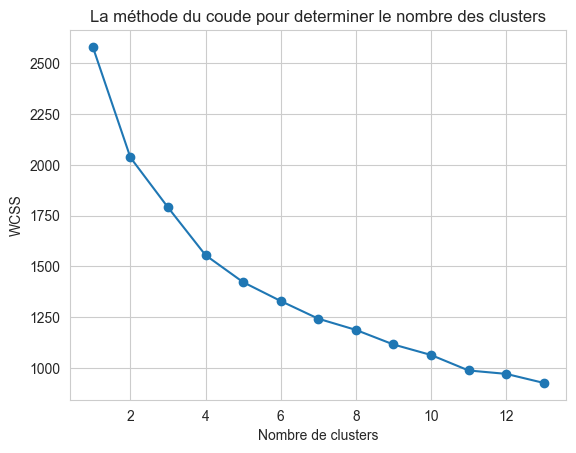

In [19]:
# Visualisation
plt.plot(range(1, 14), wcss, marker = "o")
plt.title('La méthode du coude pour determiner le nombre des clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.show()

* Pour choisir le nombre de cluster, nous allons imaginer que la courbe ci dessus est un bras, là où nous avons une cassure relativement nette, on aura le bon k (nombre de cluster), 
* Nous avons une cassure à 4 et à 6 qui sont marqués,
* Nous allons choisir le nombre de cluster égal à 5 ce qui correspond à la cassure.

### 3.3.2. Autre méthode de la détermination du nombre de cluster

In [20]:
#pip install yellowbrick

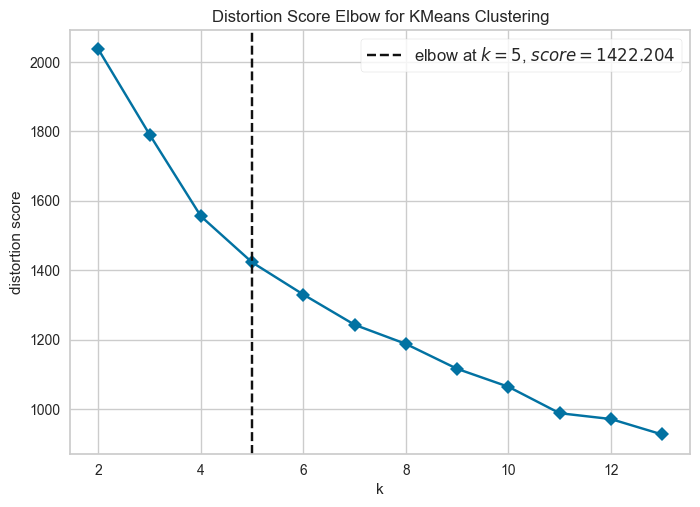

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance

# Faire une copy
#xs = df.copy()
Xs = X_scaled

# Instancier le modèle de clustering et le visualiseur
model = KMeans(random_state = 42)
visualizer = KElbowVisualizer(model, k = (2,14), metric = 'distortion', timings = False)

# Adapter les données au visualiseur
visualizer.fit(Xs)
# Finaliser et rendre la figure
visualizer.show() 

* Grâce à la métric "distorsion" qui calcule la somme des distances au carré de chaque point à son centre attribué nous donne une ségmentation du nombre de clusters K = 5.

### 3.3.3 Vérifions la séparation des clusters

* Nous utiliser le coefficient de silhouette qui va nous permettre de savoir si un point appartient au bon cluster.

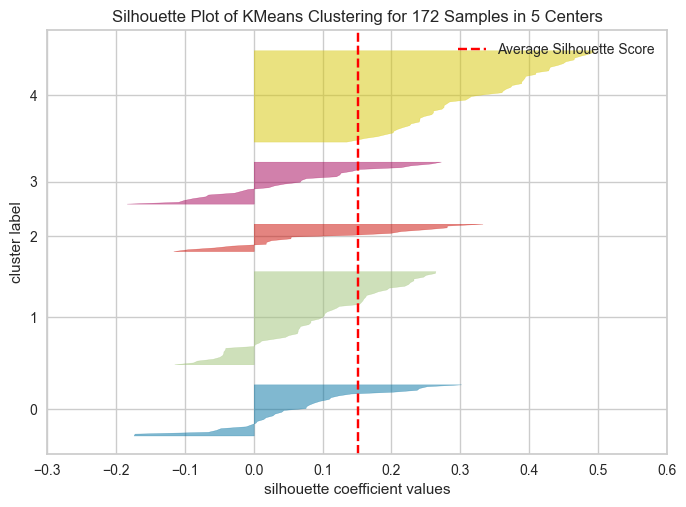

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 172 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [22]:
# Instancier le modèle de clustering et le visualiseur
model = KMeans(5, random_state = 42)
visualizer = SilhouetteVisualizer(model, colors = 'yellowbrick')

# Adapter les données au visualiseur
visualizer.fit(Xs)        
visualizer.show() 

* k = 5 est le nombre de clusters le plus raisonnable avec un coefficient de silhouette = 0.15

* Le score est calculé en faisant la moyenne du coefficient de silhouette pour chaque échantillon, calculé comme la différence entre la distance intra-grappe moyenne et la distance moyenne de la grappe la plus proche pour chaque échantillon, normalisée par la valeur maximale. Cela produit un score entre -1 et +1, où des scores proches de +1 indiquent une séparation élevée et des scores proches de -1 indiquent que les échantillons peuvent avoir été affectés au mauvais cluster.

* Dans notre cas on voit bien la séparation et la répartition des clusters qui sont claires

* Silhouette : calculé comme la différence entre la distance intra-grappe moyenne et la distance moyenne de la grappe la plus proche pour chaque échantillon, normalisée par la valeur maximale

* Nous pouvons aussi essayer d'autres métric pour pour trouver le meilleur K et faire la comparaison.

### 3.3.4. Vérifions la distance intercluster

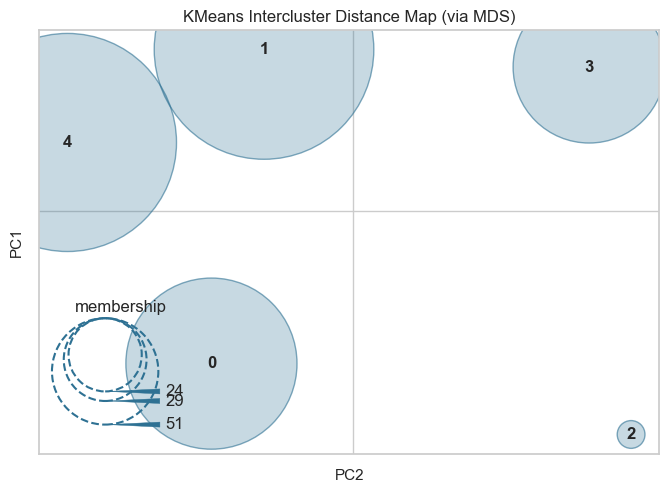

<AxesSubplot: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [23]:
# Instancier le modèle de clustering et le visualiseur
model = KMeans(5, random_state = 42)
visualizer = InterclusterDistance(model)

# Adapter les données au visualiseur
visualizer.fit(Xs)  
# Finaliser et rendre la figure
visualizer.show() 

* Sur cette projection en 2D, on voit que les différents clusters (0,2,3) sont bien séparés sur les deux premières composantes principales,
* Sauf que deux des clusters (1, 4) sont très proches.

Le clustering semble performant pour la répartion de chaque cluster.

* Après avoir créer une liste pour trouver le nombre de cluster maximal, nous allons à nous instancier le modèle avec le nombre de cluster trouvé qui est égal à 5,
* Ensuite pour pouvoir donner une étiquette aux clusters

In [24]:
# Instancier le modèle de clustering
kmeans_zone = KMeans(n_clusters = 5, init = "k-means++", random_state = 42)

# Adapter (appliquer) aux données 
kmeans_zone.fit(X_scaled)
print(kmeans_zone.fit(X_scaled))

# afficher les clusters
# labels = Kmmeans(n_clusters = 4).fit(X_scaled).labels_
# créer un dataset avec les valeurs std
# new_df = pd.DataFrame(data = X_scaled, columns = df.columns)

# prédire sur les données entrainées
clusters = kmeans_zone.predict(X_scaled)

# créer un nouveau dataframe
df_kmeans_label = pd.DataFrame(X_scaled, columns = df.columns, index = df.index)

# ajouter une nouvelle colonne pour les différents clusters
df_kmeans_label["Cluster_Kmeans"] = clusters
df_kmeans_label.head(3)

KMeans(n_clusters=5, random_state=42)


Consommation-Personnelle (kg/pers/an)  Production-Totale  \
Zone                                                                       
Afghanistan                                 -1.675306          -0.095029   
Afrique du Sud                              -0.680356           3.771801   
Albanie                                      2.837875          -0.596902   

                Importations-Totale  Exportations-Totale  Consommation-Totale  \
Zone                                                                            
Afghanistan                0.339522            -0.460188             0.540710   
Afrique du Sud             1.530961             2.734954             2.611705   
Albanie                   -0.640046            -0.597338            -0.490150   

                Disponibilité-Intérieure-Totale  Production-Poulet  \
Zone                                                                 
Afghanistan                            0.106012          -0.491109   
Afrique du Sud                         3.676665          -0.239083   
Albanie                               -0.602580          -0.581118   

                Importations-Poulet  Exportations-Poulet  Consommation-Poulet  \
Zone                                                                            
Afghanistan               -0.054194            -0.570916            -0.457214   
Afrique du Sud            -0.360197            -0.187598            -0.162182   
Albanie                    0.157654            -0.339107            -0.510253   

                Disponibilité-Intérieure-Poulet  Nbre habitant  \
Zone                                                             
Afghanistan                           -0.452495       1.441812   
Afrique du Sud                        -0.169240       2.772896   
Albanie                               -0.518368      -0.705281   

                Évolution-pop (% en 2007-2017)  Stabilité-Politique  \
Zone                                                                  
Afghanistan                           1.483620             0.002029   
Afrique du Sud                        0.114821            -0.286850   
Albanie                              -1.493729             0.507568   

                PIB/habitant ($)  Cluster_Kmeans  
Zone                                              
Afghanistan            -1.004048               1  
Afrique du Sud         -0.232015               3  
Albanie                -0.308831               4

In [25]:
# La taille des clusters
cluster_kmeans = df_kmeans_label["Cluster_Kmeans"].value_counts()
cluster_kmeans

1    52
4    51
0    29
3    24
2    16
Name: Cluster_Kmeans, dtype: int64

In [26]:
# grouper par cluster avec la moyenne
df_kmeans_clusters = df_kmeans_label.groupby("Cluster_Kmeans").mean().reset_index()
df_kmeans_clusters

Cluster_Kmeans  Consommation-Personnelle (kg/pers/an)  Production-Totale  \
0               0                               1.021092           0.075526   
1               1                              -0.723242          -0.230481   
2               2                               0.312331           0.932368   
3               3                              -0.109437           1.256099   
4               4                               0.110316          -0.691559   

   Importations-Totale  Exportations-Totale  Consommation-Totale  \
0             0.258762             0.439372            -0.151463   
1             0.091972            -0.227038            -0.188779   
2             0.608764             1.112563             0.382298   
3             0.571350             0.151339             1.907170   
4            -0.700770            -0.438607            -0.738821   

   Disponibilité-Intérieure-Totale  Production-Poulet  Importations-Poulet  \
0                        -0.102957          -0.019336             0.716901   
1                        -0.191163          -0.234236            -0.215343   
2                         0.989241           2.505452             0.955027   
3                         1.465907          -0.073566            -0.144425   
4                        -0.746733          -0.501581            -0.419736   

   Exportations-Poulet  Consommation-Poulet  Disponibilité-Intérieure-Poulet  \
0             1.092391             0.041745                         0.047232   
1            -0.246366            -0.200559                        -0.193056   
2             0.077543             2.199104                         2.255304   
3            -0.241889             0.169590                         0.089312   
4            -0.280464            -0.588967                        -0.579591   

   Nbre habitant  Évolution-pop (% en 2007-2017)  Stabilité-Politique  \
0      -0.056846                       -0.836469             0.930096   
1      -0.111064                        0.778465            -0.715771   
2       0.309600                       -0.418251             0.020084   
3       1.623344                        0.334496            -0.749759   
4      -0.715490                       -0.344284             0.547454   

   PIB/habitant ($)  
0          1.459884  
1         -0.651178  
2          0.187388  
3         -0.209828  
4         -0.126231

In [27]:
# faire une boucle for pour afficher les différents zone pour voir quel cluster ils appartiennent
for i in range(5):
    print(f'Cluster_Kmeans {i}')
    print(df_kmeans_label[df_kmeans_label.Cluster_Kmeans == i].index.tolist())
    print()

Cluster_Kmeans 0
['Allemagne', 'Autriche', 'Belgique', 'Bulgarie', 'Canada', 'Chine - RAS de Hong-Kong', 'Croatie', 'Cuba', 'Danemark', 'Espagne', 'Estonie', 'Finlande', 'France', 'Grèce', 'Irlande', 'Italie', 'Japon', 'Koweït', 'Lettonie', 'Lituanie', 'Norvège', 'Nouvelle-Zélande', 'Oman', 'Slovaquie', 'Slovénie', 'Suisse', 'Suède', 'Tchéquie', "États-Unis d'Amérique"]

Cluster_Kmeans 1
['Afghanistan', 'Azerbaïdjan', 'Bangladesh', 'Brésil', 'Burkina Faso', 'Bénin', 'Cambodge', 'Congo', 'Djibouti', 'El Salvador', 'Gabon', 'Gambie', 'Guinée', 'Guinée-Bissau', 'Haïti', 'Honduras', 'Inde', 'Indonésie', "Iran (République islamique d')", 'Jordanie', 'Liban', 'Libéria', 'Madagascar', 'Malaisie', 'Malawi', 'Maldives', 'Mali', 'Mauritanie', 'Mexique', 'Mozambique', 'Nicaragua', 'Niger', 'Nigéria', 'Pakistan', 'Paraguay', 'Philippines', 'Rwanda', 'République centrafricaine', 'République populaire démocratique de Corée', 'Sierra Leone', 'Sri Lanka', 'Sénégal', 'Tadjikistan', 'Tchad', 'Togo', 'Tu

### 3.3.5. Visualisation des clusters avec le Kmeans

In [28]:
font_title = {"family": "serif",
              "color":  "#476bff",
              "weight": "bold",
              "size": 10}
#plt.rcParams["figure.figsize"] = (12, 8)

In [29]:
# faire une copy
df = df_final.copy()

# Standardiser (center et réduire nos données)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
X_scaled = pd.DataFrame(X_scaled, index=df.index, columns=df.columns)
kmeans_labels = kmeans_zone.predict(X_scaled)
X_scaled["kmeans_label"] = kmeans_labels
X_scaled_clusters = X_scaled.groupby("kmeans_label").mean()
X_scaled_clusters

Consommation-Personnelle (kg/pers/an)  Production-Totale  \
kmeans_label                                                             
0                                          1.021092           0.075526   
1                                         -0.723242          -0.230481   
2                                          0.312331           0.932368   
3                                         -0.109437           1.256099   
4                                          0.110316          -0.691559   

              Importations-Totale  Exportations-Totale  Consommation-Totale  \
kmeans_label                                                                  
0                        0.258762             0.439372            -0.151463   
1                        0.091972            -0.227038            -0.188779   
2                        0.608764             1.112563             0.382298   
3                        0.571350             0.151339             1.907170   
4                       -0.700770            -0.438607            -0.738821   

              Disponibilité-Intérieure-Totale  Production-Poulet  \
kmeans_label                                                       
0                                   -0.102957          -0.019336   
1                                   -0.191163          -0.234236   
2                                    0.989241           2.505452   
3                                    1.465907          -0.073566   
4                                   -0.746733          -0.501581   

              Importations-Poulet  Exportations-Poulet  Consommation-Poulet  \
kmeans_label                                                                  
0                        0.716901             1.092391             0.041745   
1                       -0.215343            -0.246366            -0.200559   
2                        0.955027             0.077543             2.199104   
3                       -0.144425            -0.241889             0.169590   
4                       -0.419736            -0.280464            -0.588967   

              Disponibilité-Intérieure-Poulet  Nbre habitant  \
kmeans_label                                                   
0                                    0.047232      -0.056846   
1                                   -0.193056      -0.111064   
2                                    2.255304       0.309600   
3                                    0.089312       1.623344   
4                                   -0.579591      -0.715490   

              Évolution-pop (% en 2007-2017)  Stabilité-Politique  \
kmeans_label                                                        
0                                  -0.836469             0.930096   
1                                   0.778465            -0.715771   
2                                  -0.418251             0.020084   
3                                   0.334496            -0.749759   
4                                  -0.344284             0.547454   

              PIB/habitant ($)  
kmeans_label                    
0                     1.459884  
1                    -0.651178  
2                     0.187388  
3                    -0.209828  
4                    -0.126231

In [30]:
"""scaler = StandardScaler()
scaler.fit(df)
X_b = scaler.inverse_transform(X_scaled.iloc[:, :-1])
X_b"""

'scaler = StandardScaler()\nscaler.fit(df)\nX_b = scaler.inverse_transform(X_scaled.iloc[:, :-1])\nX_b'

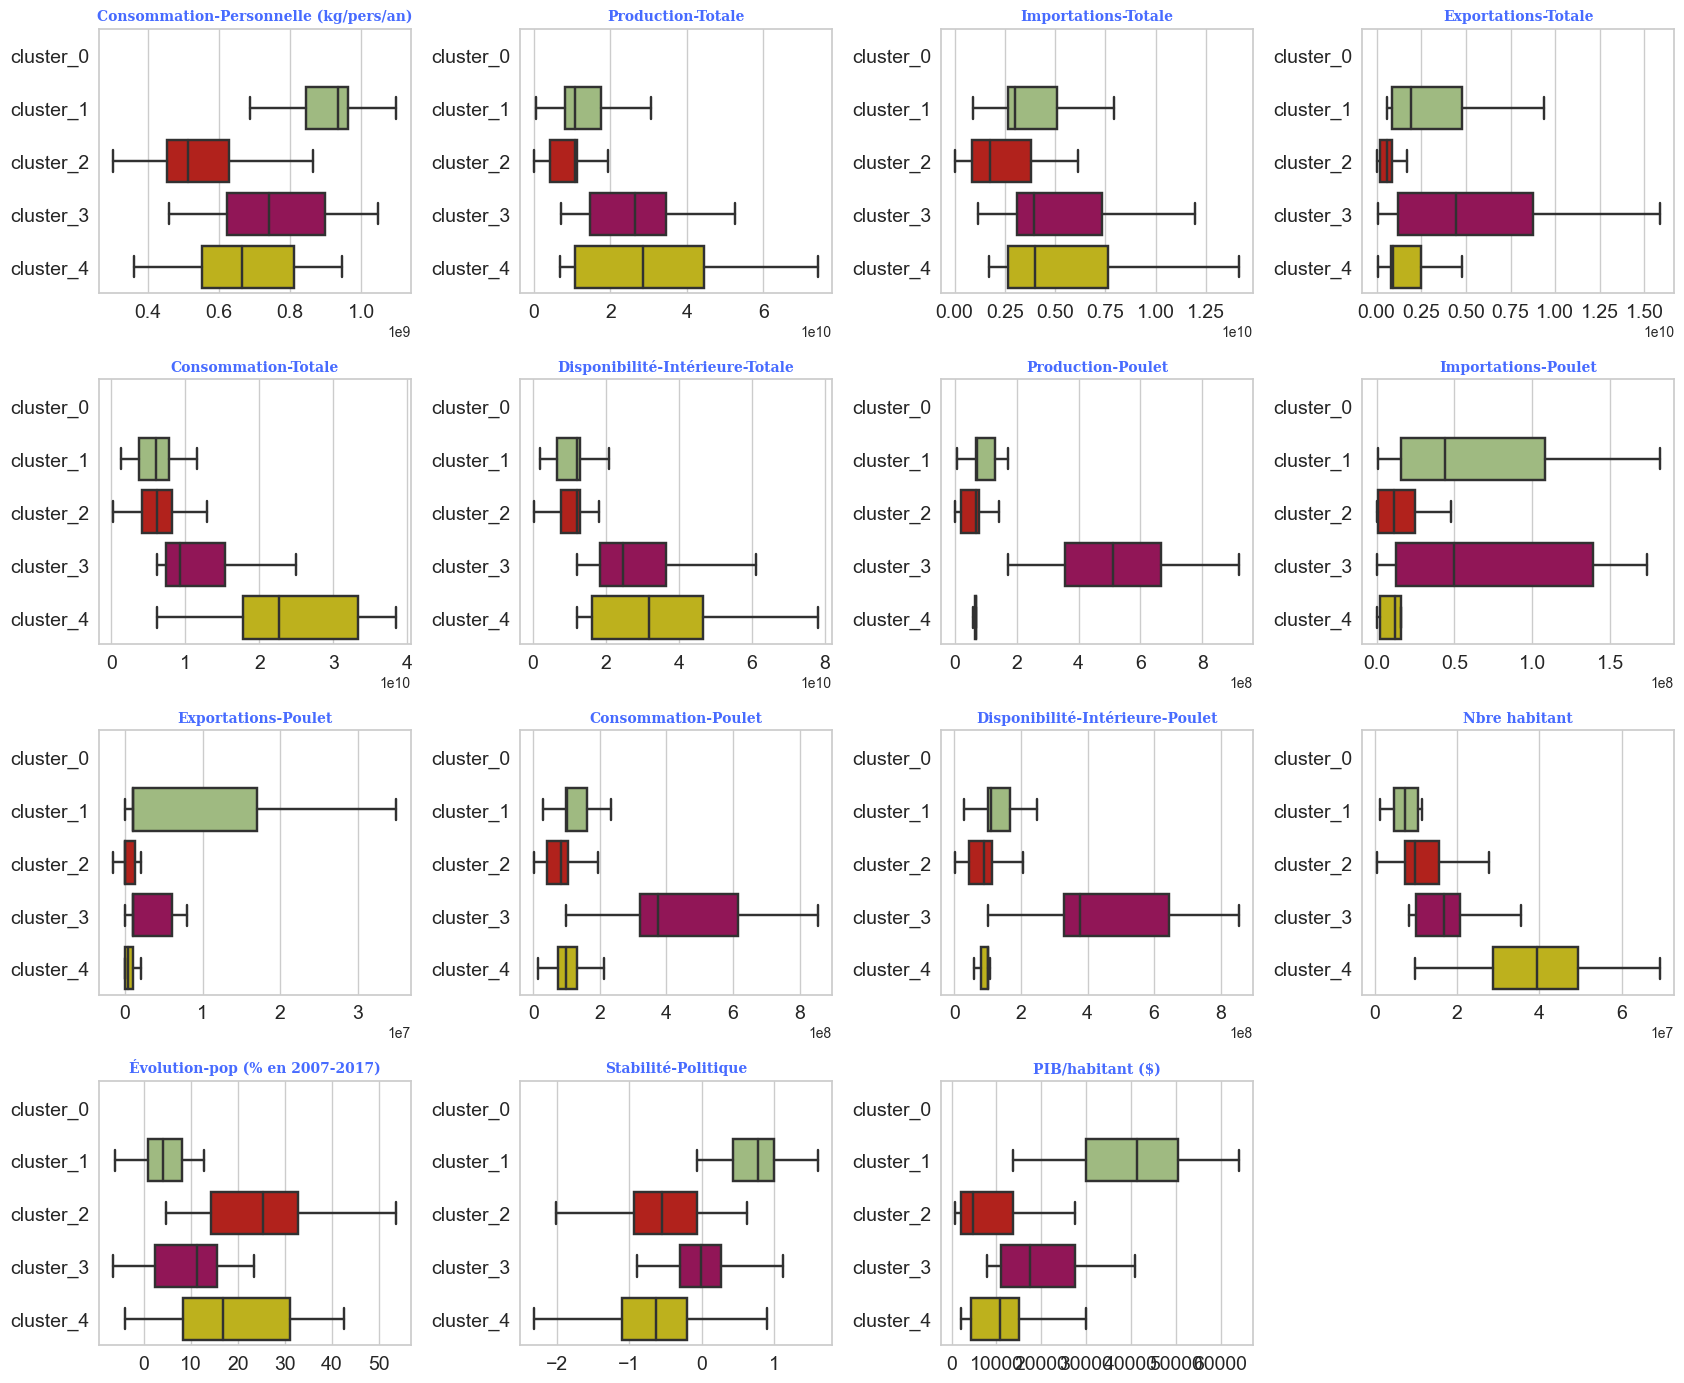

In [31]:
scaler = StandardScaler()
scaler.fit(df)
X_b = scaler.inverse_transform(X_scaled.iloc[:, :-1])
X_b = pd.DataFrame(X_b, index=df.index, columns=df.columns)
X_b["kmeans_label"] = kmeans_labels
X_b


# Visualisation avec les boxplots
for i in X_b['kmeans_label'].unique():
    X_b['kmeans_label'].replace(i, f"cluster_{i+1}", inplace=True)


fig, ax = plt.subplots(figsize=(17, 14))
#fig.suptitle('Boxplot par cluster',
 #            fontdict=font_title, fontsize=25, y=1)
j = 0
for i, feat in enumerate(X_b.columns[:-1]):
    if X_b[feat].quantile(0.95) > 0.9+X_b[feat].quantile(0.20):
        plt.subplot(4, 4, i+1-j)
        ax = sns.boxplot(data=X_b, x=feat, y="kmeans_label",
                         order=["cluster_0", "cluster_1", "cluster_2",
                                "cluster_3", "cluster_4"],
                         showfliers=False)
        plt.title(feat, fontdict=font_title)
        #plt.title(f'Cluster {cluster}', x=0.3, fontdict=font_title)
        plt.xlabel("")
        plt.ylabel("")
        plt.xticks(size=14)
        plt.yticks(size=14)
    else:
        j += 1


fig.tight_layout()

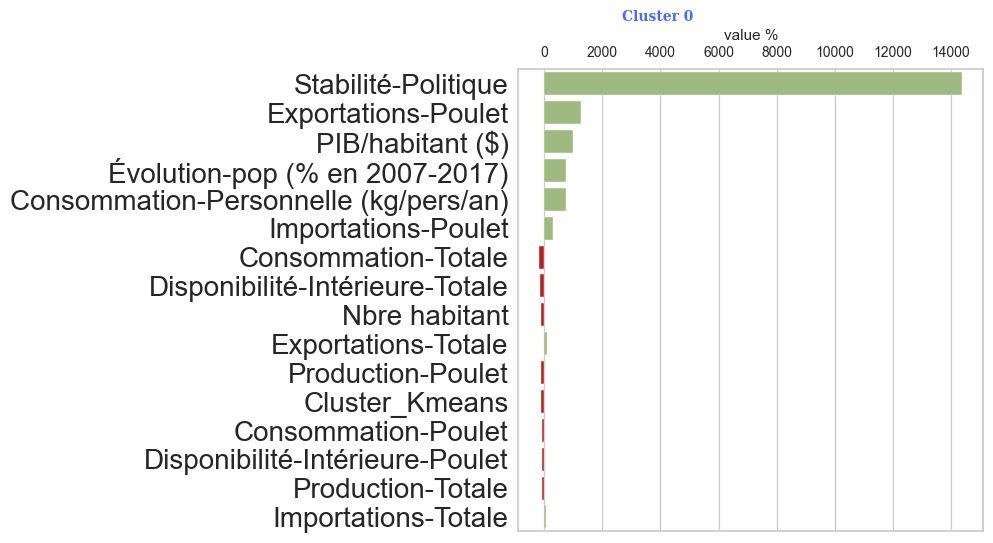

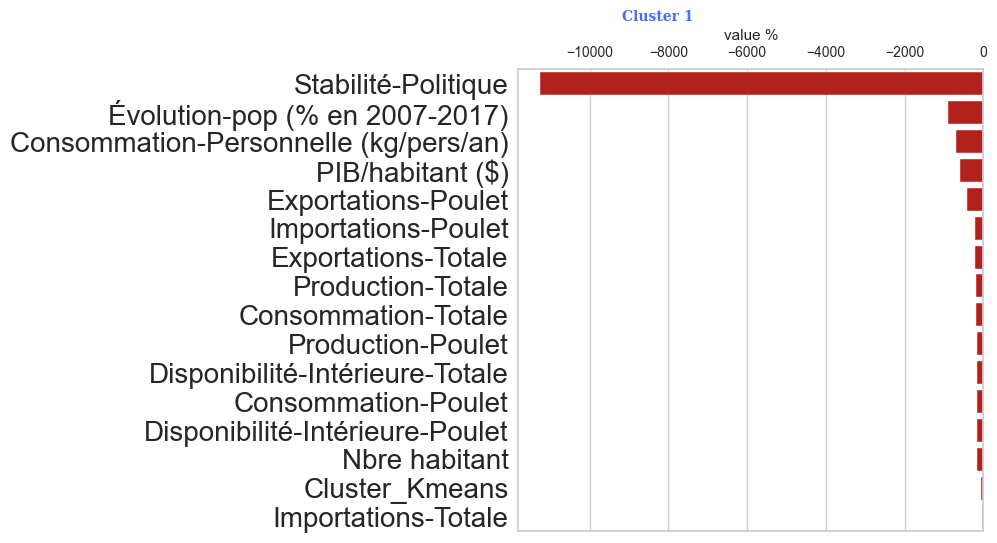

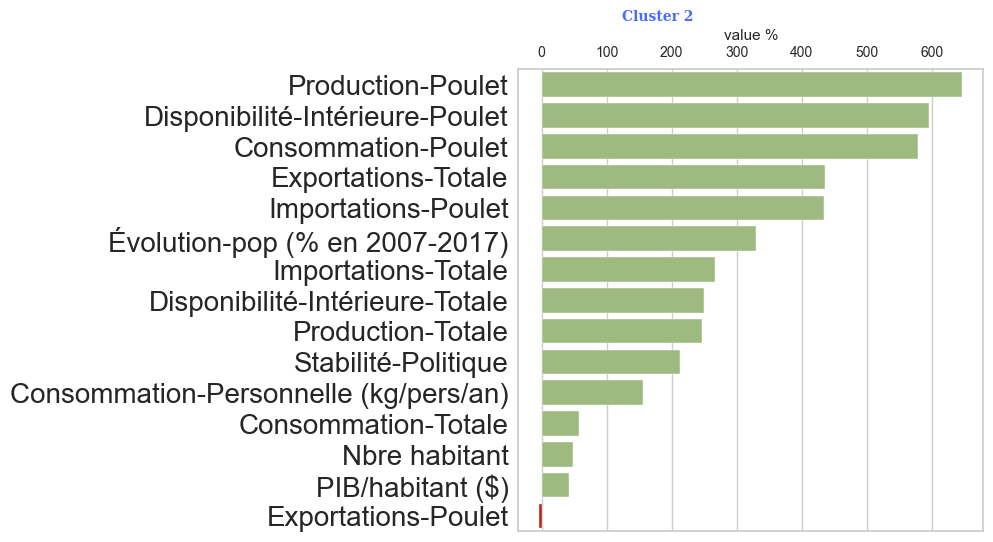

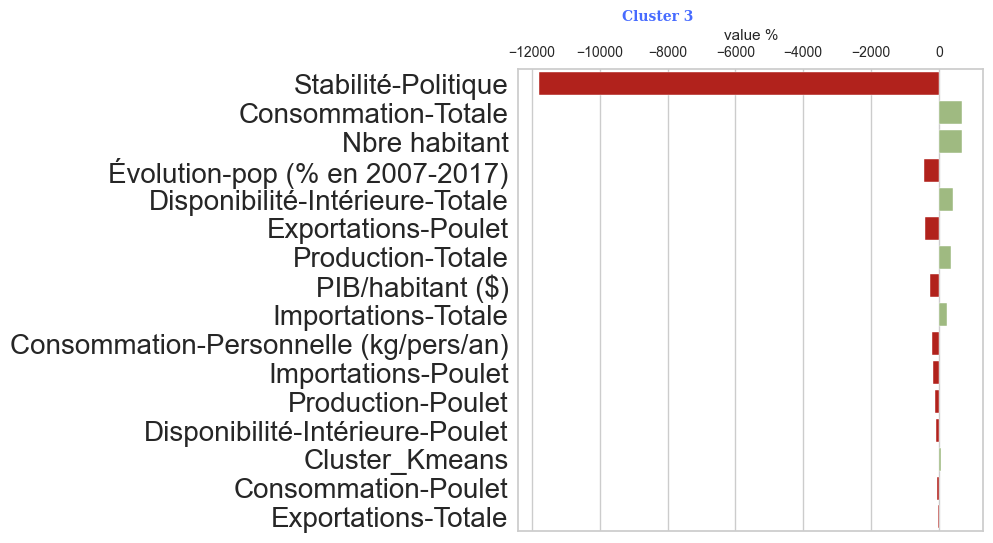

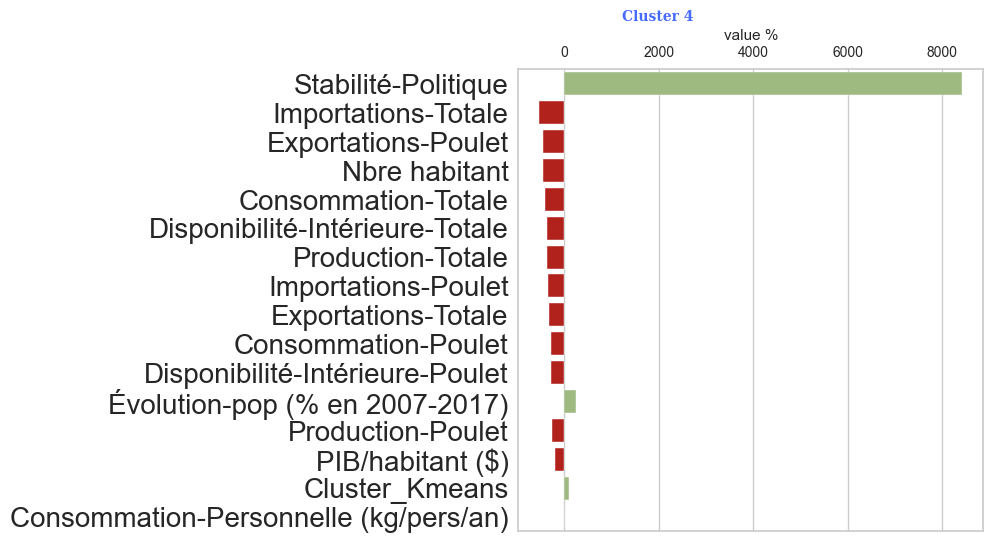

In [32]:
# Visualisation avec les barplot
for i, cluster in enumerate(df_kmeans_clusters['Cluster_Kmeans'].unique()):
    # data recovery
    to_plot = (
        (df_kmeans_clusters[df_kmeans_clusters['Cluster_Kmeans'] == cluster].mean()/df_kmeans_clusters.mean()-1)*100)
    to_plot = pd.DataFrame(to_plot, columns=['value %']).replace(np.inf, 50)
    to_plot['Features'] = to_plot.index
    to_plot = to_plot.sort_values(ascending=False, by='value %', key=abs)

    # fig
    to_plot = to_plot[to_plot['value %'] != 0].dropna(axis=0)
    colors = ['g' if c >= 0 else 'r' for c in to_plot['value %']]
    fig, ax = plt.subplots(figsize=(6, 6))
    plt.title(f'Cluster {cluster}', x=0.3, fontdict=font_title)
    sns.barplot(data=to_plot, y='Features', x='value %', palette=colors)
    plt.yticks(fontsize=20)
    plt.ylabel(None)
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    # plt.legend(labels=None)
    plt.show()

### 3.3.6. Interprétation des clusters avec le Kmeans

In [33]:
df_kmeans_clusters

Cluster_Kmeans  Consommation-Personnelle (kg/pers/an)  Production-Totale  \
0               0                               1.021092           0.075526   
1               1                              -0.723242          -0.230481   
2               2                               0.312331           0.932368   
3               3                              -0.109437           1.256099   
4               4                               0.110316          -0.691559   

   Importations-Totale  Exportations-Totale  Consommation-Totale  \
0             0.258762             0.439372            -0.151463   
1             0.091972            -0.227038            -0.188779   
2             0.608764             1.112563             0.382298   
3             0.571350             0.151339             1.907170   
4            -0.700770            -0.438607            -0.738821   

   Disponibilité-Intérieure-Totale  Production-Poulet  Importations-Poulet  \
0                        -0.102957          -0.019336             0.716901   
1                        -0.191163          -0.234236            -0.215343   
2                         0.989241           2.505452             0.955027   
3                         1.465907          -0.073566            -0.144425   
4                        -0.746733          -0.501581            -0.419736   

   Exportations-Poulet  Consommation-Poulet  Disponibilité-Intérieure-Poulet  \
0             1.092391             0.041745                         0.047232   
1            -0.246366            -0.200559                        -0.193056   
2             0.077543             2.199104                         2.255304   
3            -0.241889             0.169590                         0.089312   
4            -0.280464            -0.588967                        -0.579591   

   Nbre habitant  Évolution-pop (% en 2007-2017)  Stabilité-Politique  \
0      -0.056846                       -0.836469             0.930096   
1      -0.111064                        0.778465            -0.715771   
2       0.309600                       -0.418251             0.020084   
3       1.623344                        0.334496            -0.749759   
4      -0.715490                       -0.344284             0.547454   

   PIB/habitant ($)  
0          1.459884  
1         -0.651178  
2          0.187388  
3         -0.209828  
4         -0.126231

##### Groupe 0
* Ce sont des pays avec une très faible taux d'évolution de la population, très faible le nombre d'habitant, faible taux de production, d'importations, d'exportations et consommation de poulet;
* Avec une stabilité politique moyennement élevé et un produit intérieur brut (PIb) très faibles. 
##### Groupe 1
* Faible taux d'évolution de leur population, Nombre d'habitant élevé, faible taux d'importations, d'exportations et consommation de poulet;
* PIB faible avec une stabilité politique assez faible.
##### Groupe 2
* Nombre d'habitants et taux d'évolution de la population assez faible;
* Une forte taux d'importations et une très faible consommation de poulet;
* Stabilité politique et un PIB élevés. 
##### Groupe 3
* Faible taux d'évolution de la population et du nombre d'habitant, faible taux d'importation d'exportation et consommation de poulet;
* Stabilité politique assez élevé et PIB très faible.
##### Groupe 4
* Très faible taux d'évolution de la population, forte taux d'importation et consommation de poulet;
* Exportation de poulet assez faible;
* PIB et stabilité politique trés faible.

## 3.4. Calcul des composantes principales (PCA)

In [34]:
# fonction pour afficher les composantes principales
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c = "red",marker = 'o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block = False)

Nombre de composantes calculées :  [[ 0.1078969   0.32540975  0.27814281  0.25890249  0.2970782   0.3532593
   0.31373721  0.21847591  0.07148185  0.37196647  0.36513179  0.27966198
  -0.06802385 -0.06706095  0.12139729]
 [-0.39871053  0.13187898 -0.00820694 -0.1658566   0.24015451  0.18738614
  -0.06432125 -0.20463403 -0.28612355 -0.0299652  -0.03265388  0.237362
   0.395219   -0.4236291  -0.42594689]
 [-0.23625013 -0.31381345  0.01546497 -0.16922458 -0.33458409 -0.20368287
   0.39244017  0.0415577  -0.01613702  0.41642689  0.43664033 -0.29379446
   0.16722421 -0.07644938 -0.15235204]
 [-0.25035102 -0.03190023  0.42498004  0.39200166 -0.0624883  -0.13498347
  -0.24196441  0.27951422  0.5203195  -0.0955119  -0.1142549  -0.16927063
   0.24057062 -0.22938409 -0.10573642]
 [ 0.22242563 -0.47159566  0.49814161 -0.42455235  0.27682048 -0.22424517
  -0.11106347  0.04367087 -0.04624302  0.0146171   0.01541256  0.26347459
  -0.0599943  -0.21647441  0.19002087]
 [-0.1261483   0.04435606 -0.1804

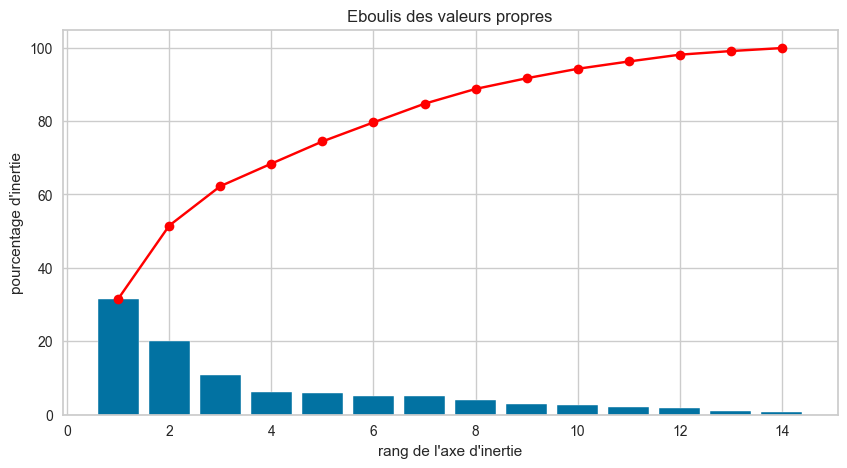

In [35]:
# définir le nombre de composantes (le nombre de colonnes)
n_comp = 14

# calcul des composantes principales (= modèle appliqué sur les données)
pca = PCA(n_components = n_comp)

# appliquer l'algorithme entrainé
pca_components = pca.fit(X_scaled_CAH)

# nombre de composantes
pcs = pca.components_
print("Nombre de composantes calculées : ", pcs)
print("------------------------------------------------")
print("Proportion de variance expliquée : ", pca.explained_variance_ratio_)
print("------------------------------------------------")
print("Cumul de variance expliquée : ", pca.explained_variance_ratio_.cumsum())


# Eboulis des valeurs propres
plt.figure(figsize = (10,5))
# Appel à la fonction
display_scree_plot(pca)

* Le nombre de composant est égale à 6 me fera une variance de 80% c'est à dire là où les composantes supplémentaires commencent à apporter très peu d'information en plus ce qui nous a permis de choisir comme 6 le nombre de composants.

In [36]:
# appliquer l'acp pour avoir 6 composants du moment que 4 composantes nous permettent d'avoir 78% de l'information
pca = PCA(n_components = 6).fit(X_scaled_CAH)
print(pca)

# Projection sur les 6 composantes (faire des calculs sur les données transformées)
Xk_projected = pca.transform(X_scaled_CAH)
print(Xk_projected.shape)

PCA(n_components=6)
(172, 6)


In [37]:
print("Nombre de composantes calculées : ", pca.components_)
print("------------------------------------------------")
print("Proportion de variance expliquée : ", pca.explained_variance_ratio_)
print("------------------------------------------------")
print("Cumul de variance expliquée : ", pca.explained_variance_ratio_.cumsum())

Nombre de composantes calculées :  [[ 0.1078969   0.32540975  0.27814281  0.25890249  0.2970782   0.3532593
   0.31373721  0.21847591  0.07148185  0.37196647  0.36513179  0.27966198
  -0.06802385 -0.06706095  0.12139729]
 [-0.39871053  0.13187898 -0.00820694 -0.1658566   0.24015451  0.18738614
  -0.06432125 -0.20463403 -0.28612355 -0.0299652  -0.03265388  0.237362
   0.395219   -0.4236291  -0.42594689]
 [-0.23625013 -0.31381345  0.01546497 -0.16922458 -0.33458409 -0.20368287
   0.39244017  0.0415577  -0.01613702  0.41642689  0.43664033 -0.29379446
   0.16722421 -0.07644938 -0.15235204]
 [-0.25035102 -0.03190023  0.42498004  0.39200166 -0.0624883  -0.13498347
  -0.24196441  0.27951422  0.5203195  -0.0955119  -0.1142549  -0.16927063
   0.24057062 -0.22938409 -0.10573642]
 [ 0.22242563 -0.47159566  0.49814161 -0.42455235  0.27682048 -0.22424517
  -0.11106347  0.04367087 -0.04624302  0.0146171   0.01541256  0.26347459
  -0.0599943  -0.21647441  0.19002087]
 [-0.1261483   0.04435606 -0.1804

<AxesSubplot: >

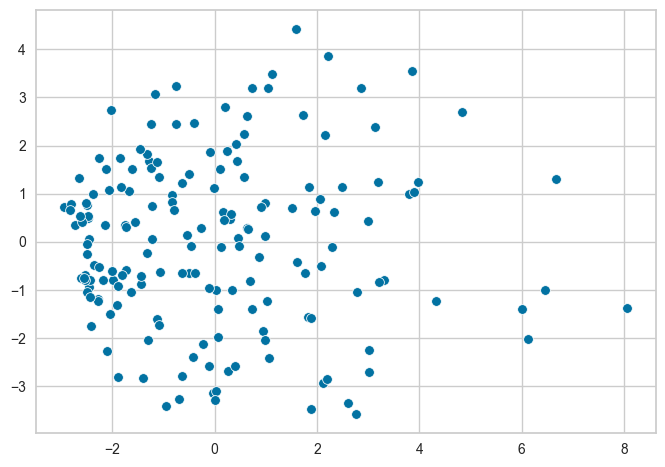

In [38]:
# dessiner les projections de x_scaled sur les deux premiers composantes qu'on a trouvé en utlisant ACP (4 composantes)
# C'est à dire les 236 points représentés en 2 dimensions
sns.scatterplot(data = Xk_projected, x = Xk_projected[:, 0], y = Xk_projected[:, 1], alpha =  1)

* Chacun de ces points représentent une zone (pays) représentés en deux dimensions
* Avec cette visualisation ci dessus , on ne pourra pas apprendre grand chose puisque on ne pourra pas identifier les différents groupes (clusters),
* Après avoir compris mes composants et réduire mes dimensions, je peux déssiner mes données avec les groupes de clusters et 
* Pour mieux identifier les groupes , on pourra se baser sur l'algorithme Kmeans (avec les clusters)
* Maintenant il reste à placer les clusters ("Label") dans les nuages de points.

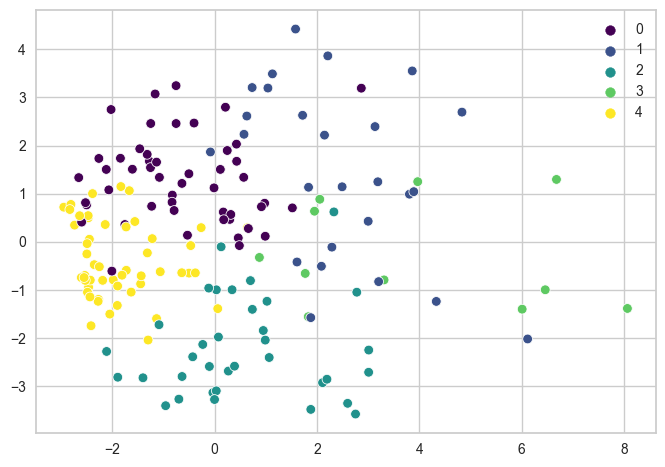

In [39]:
# Visualisation
sns.scatterplot(data = Xk_projected, x = Xk_projected[:, 0], y = Xk_projected[:, 1], palette = 'viridis', alpha = 1, hue = agg_cluster.labels_)
plt.legend()
plt.show()

* Nous obtenons un nuage des points avec les quatres (4) clusters.
* Maintenant nous allons créer une fonction de cercle des corrélations pour mieux visualiser les variables correlées avec chacune des 6 composantes 
* Mais aussi la projection sur les zones (pays)

In [40]:
# Fonction pour le cercle de corrélation
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(10,10))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            an = np.linspace(0, 2 * np.pi, 100)  # Ajoutez un cercle d'unité pour l'échelle
            plt.plot(np.cos(an), np.sin(an))
            plt.axis('equal')

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

* Nous allons représenter nos 6 composantes avec les différentes variables (colonnes).

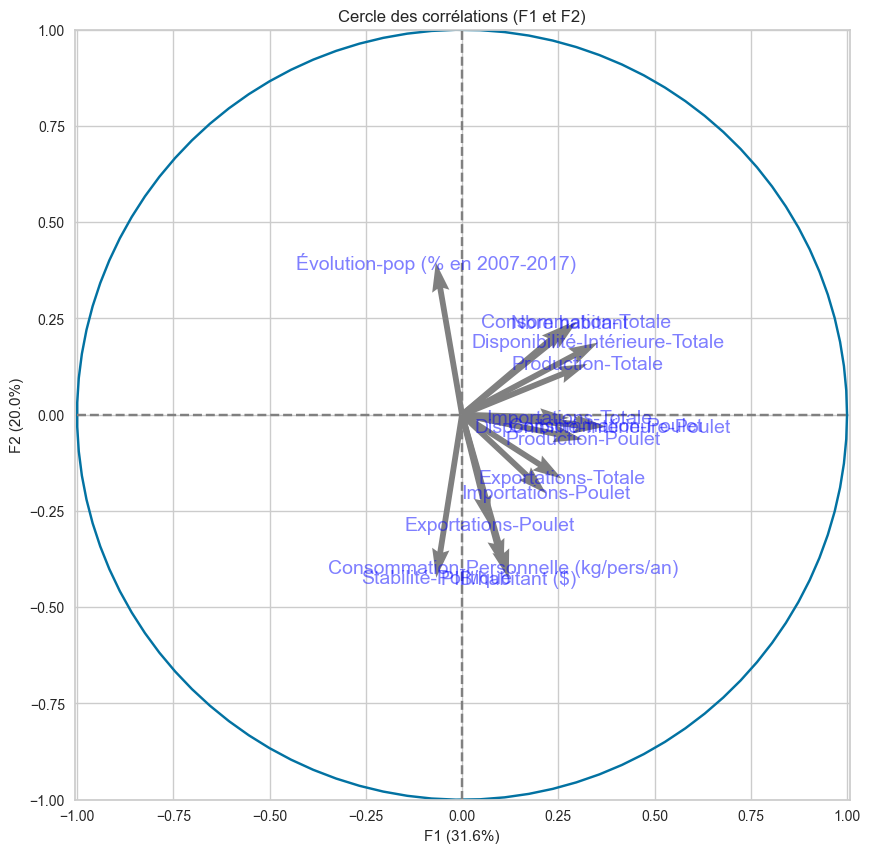

In [41]:
# Appel aux paramètres de la fonction
index = df_CAH.index 
features = df_CAH.columns
n_comp = 6
pca = PCA(n_components = 6).fit(X_scaled_CAH)
Xk_projected = pca.transform(X_scaled_CAH)
pcs = pca.components_

# Appel à la fonction sur les composantes 0 et 1
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

* La projection de la flèche représente la contribution de chacune des variables (représentant la variable v) sur F1 correspond au coefficient de corrélation entre v et F1 c'est à dire si deux variables évoluent quasiment de la même manière par exemple,
* Nous pouvons retrouver toutes coordonnées de mes composantes principale dans "pca.components_"

In [42]:
# La contribution de chaque variable à chaque composante (pour F1)
F1 = pca.components_[0]
F1

array([ 0.1078969 ,  0.32540975,  0.27814281,  0.25890249,  0.2970782 ,
        0.3532593 ,  0.31373721,  0.21847591,  0.07148185,  0.37196647,
        0.36513179,  0.27966198, -0.06802385, -0.06706095,  0.12139729])

In [43]:
# La contribution de chaque variable à chaque composante (pour F2)
F2 = pca.components_[1]
F2

array([-0.39871053,  0.13187898, -0.00820694, -0.1658566 ,  0.24015451,
        0.18738614, -0.06432125, -0.20463403, -0.28612355, -0.0299652 ,
       -0.03265388,  0.237362  ,  0.395219  , -0.4236291 , -0.42594689])

##### Les variables correlées positivement à F1
* Disponibilité-Intérieure-poulet
* Production-Poulet
* Production-Totale
* Disponibilté-Intérieure
* Exportation 
* Nbre habitant
* Consommation-Totale
* Disponibilité-Intérieure-Totale
##### Les variables correlées négativement à F1
* Evolution-pop (% 2007-2017)
* Consommation-Personnelle (Kg/pers/an)
##### Les variables correlées positivement à F2
* Evolution-pop (% 2007-2017)
##### Les variables correlées négativement à F2
* Consommation-Personnelle (Kg/pers/an)
* Stabilité politique
* PIB/ habitant
* Exportation-Poulet

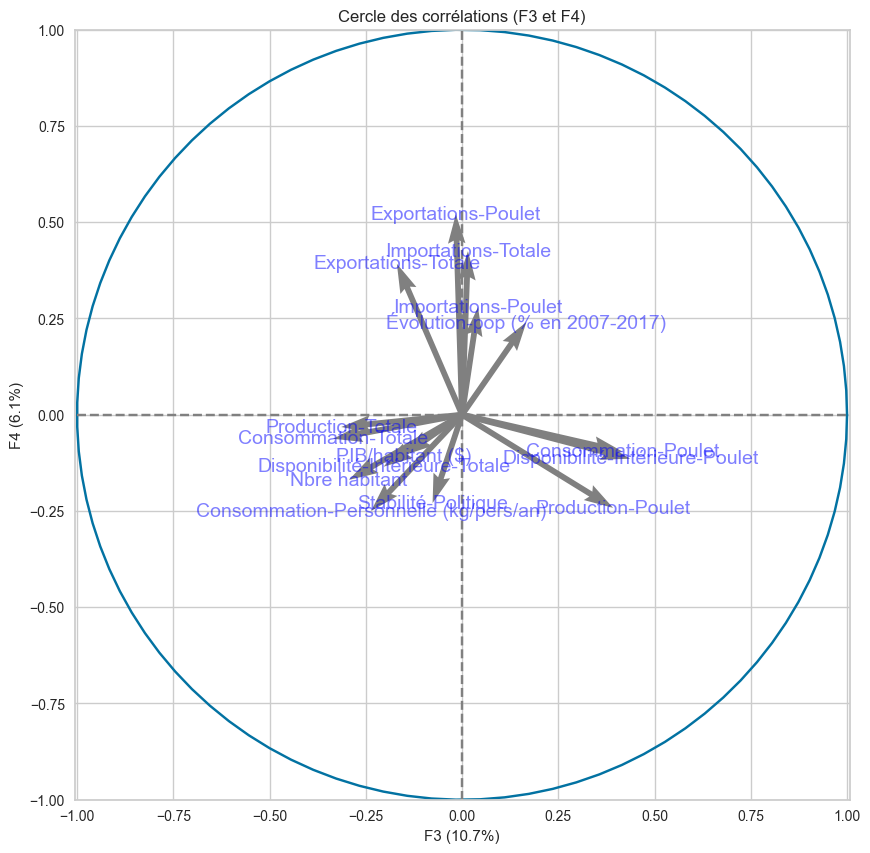

In [44]:
# Appel à la fonction sur les composantes 2 et 3
display_circles(pcs, n_comp, pca, [(2,3)], labels = np.array(features))

In [45]:
# La contribution de chaque variable à chaque composante (pour F3) 
F3 = pca.components_[2]
F3

array([-0.23625013, -0.31381345,  0.01546497, -0.16922458, -0.33458409,
       -0.20368287,  0.39244017,  0.0415577 , -0.01613702,  0.41642689,
        0.43664033, -0.29379446,  0.16722421, -0.07644938, -0.15235204])

In [46]:
# La contribution de chaque variable à chaque composante (pour F4)
F4 = pca.components_[3]
F4

array([-0.25035102, -0.03190023,  0.42498004,  0.39200166, -0.0624883 ,
       -0.13498347, -0.24196441,  0.27951422,  0.5203195 , -0.0955119 ,
       -0.1142549 , -0.16927063,  0.24057062, -0.22938409, -0.10573642])

##### Les variables correlées positivement à F3
* Consommation-Poulet
* Disponibilité-Intérieure-Poulet
* Production-Poulet
##### Les variables correlées négativement à F3
* Production-Totale
* Consommation-Totale
* PIB/habitant ($)
* Disponibilité-Intérieure-Totale
* Nbre habitant
##### Les variables correlées positivement à F4
* Exportation-Totale
* Exportation-Poulet
* Importations-Totale
* Importations-Poulet
* Evolution-pop (% en 2007-2017)
##### Les variables correlées négativement à F4
* Stabilité-Politique
* Consommation-Personnelle (Kg/pers/an)

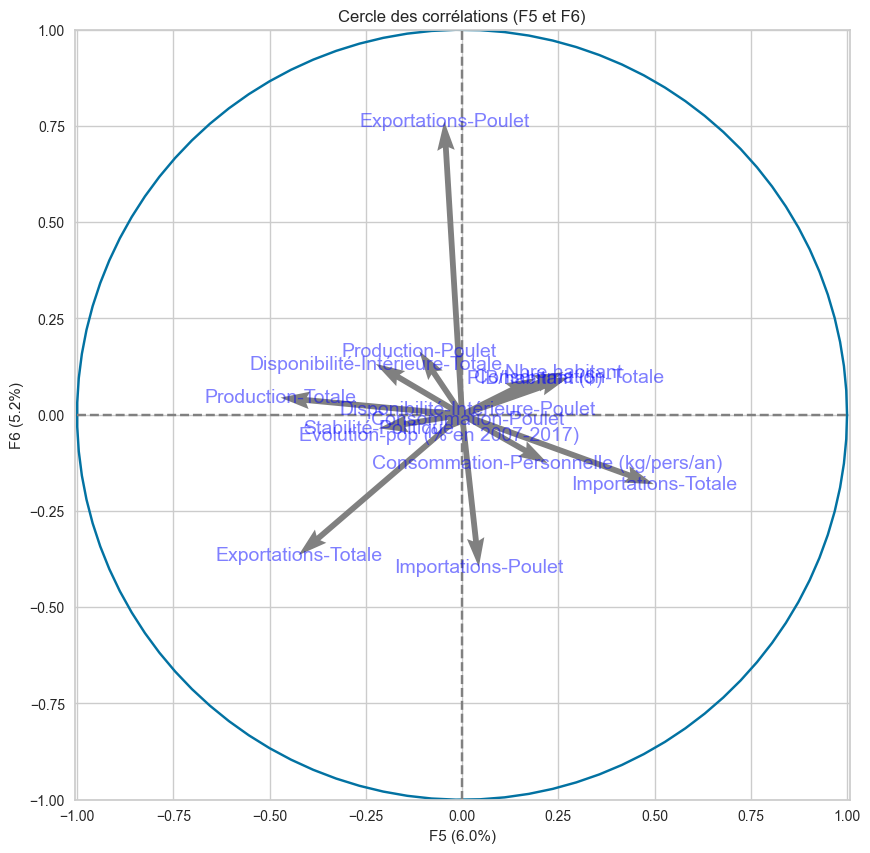

In [47]:
# Appel à la fonction sur les composantes 2 et 3
display_circles(pcs, n_comp, pca, [(4,5)], labels = np.array(features))

In [48]:
# La contribution de chaque variable à chaque composante (pour F4) 
F5 = pca.components_[4]
F5

array([ 0.22242563, -0.47159566,  0.49814161, -0.42455235,  0.27682048,
       -0.22424517, -0.11106347,  0.04367087, -0.04624302,  0.0146171 ,
        0.01541256,  0.26347459, -0.0599943 , -0.21647441,  0.19002087])

In [49]:
# La contribution de chaque variable à chaque composante (pour F)5 
F6 = pca.components_[5]
F6

array([-0.1261483 ,  0.04435606, -0.18049482, -0.36468383,  0.09692155,
        0.13216333,  0.16522958, -0.39553975,  0.76211825, -0.0117402 ,
        0.01288341,  0.11044281, -0.04852322, -0.03546064,  0.09484415])

##### Les variables correlées positivement à F5
* Nbre habitant
* PIB/habitant ($)
* Importation-Totale
* Consommation-Personnelle (Kg/pers/an)
##### Les variables correlées négativement à F5
* Production-Poulet
* Disponibilité-Intérieure-Totale
* Production Totale
##### Les variables correlées positivement à F6
* Exportation-Poulet
* Production-Poulet
* Disponibilité-Intérieure-Totale
* Production Totale
##### Les variables correlées négativement à F6
* Exportation-Totale
* Importation-Poulet

### 3.4.1. Projection des individus avec CAH

In [50]:
# Définition de la fonction pour le graphique Projection des individus sur les plans factoriels
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure
            fig = plt.figure(figsize=(20, 10))

            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1],
                            X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(
                        X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i, (x, y) in enumerate(X_projected[:, [d1, d2]]):
                    plt.text(x, y, labels[i],
                             fontsize='14', ha='center', va='center')

            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1, d2]])) * 1.1
            plt.xlim([-boundary, boundary])
            plt.ylim([-boundary, boundary])

            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(
                d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('F{} ({}%)'.format(
                d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))

            plt.title(
                "Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

In [51]:
# Appel aux paramètres de la fonction
index = df_CAH.index 
features = df_CAH.columns
n_comp = 6
pca = PCA(n_components = 6).fit(X_scaled_CAH)
Xk_projected = pca.transform(X_scaled_CAH)
# contribution de chaque variable à chaque composante
pcs = pca.components_

<Figure size 1500x1500 with 0 Axes>

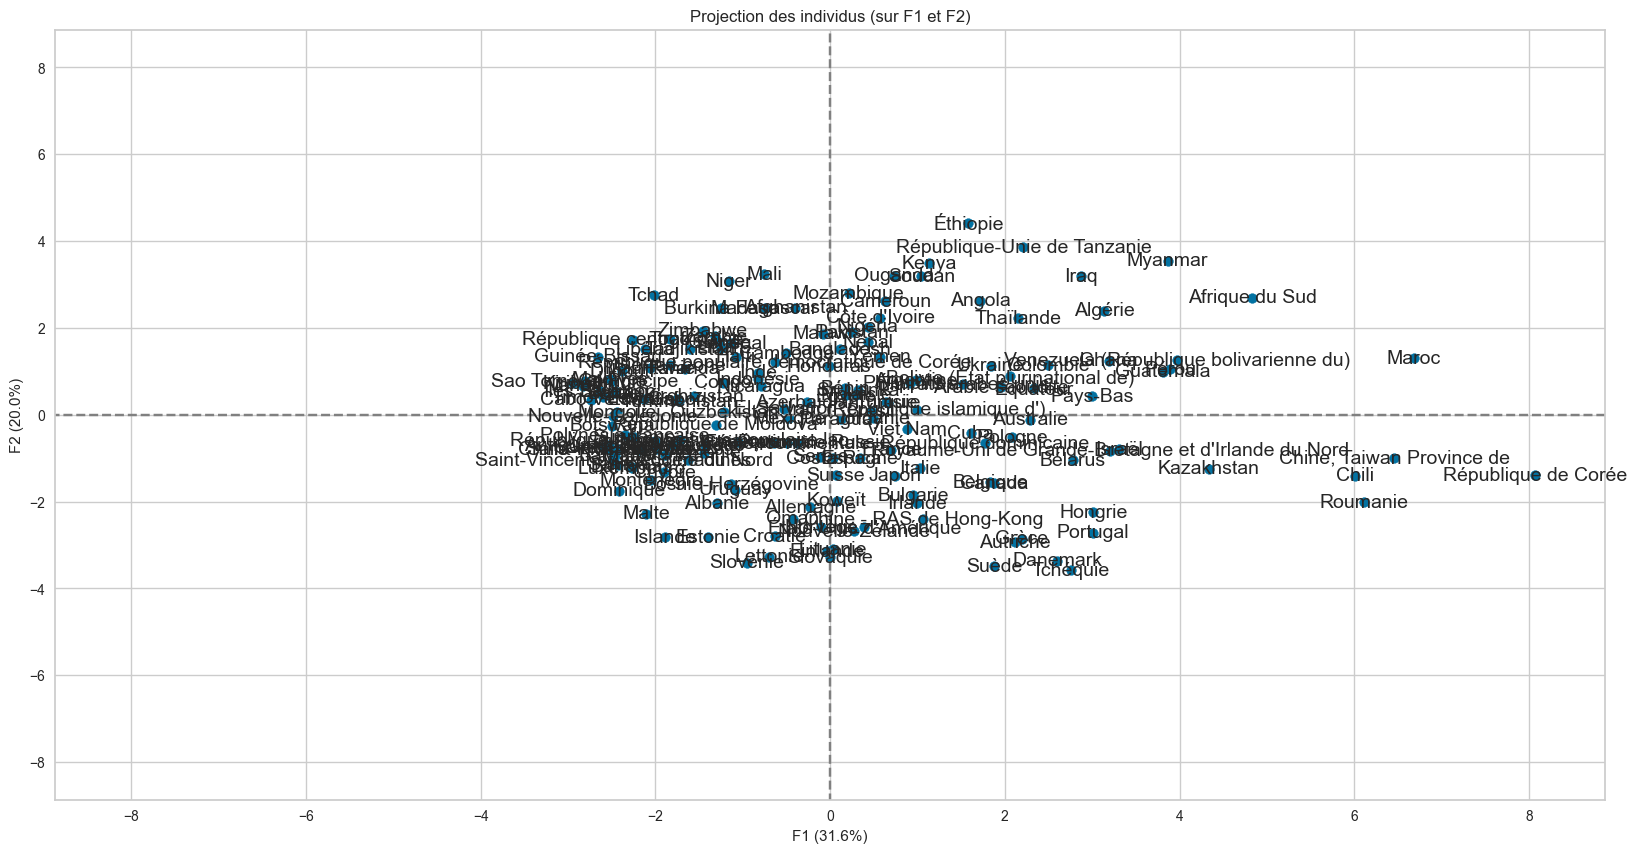

In [52]:
# Appel à la fonction sur les composantes 1 et 2
plt.figure(figsize=(15,15))
display_factorial_planes(Xk_projected, n_comp, pca, [(0,1)], labels = np.array(df_CAH.index))
plt.show()

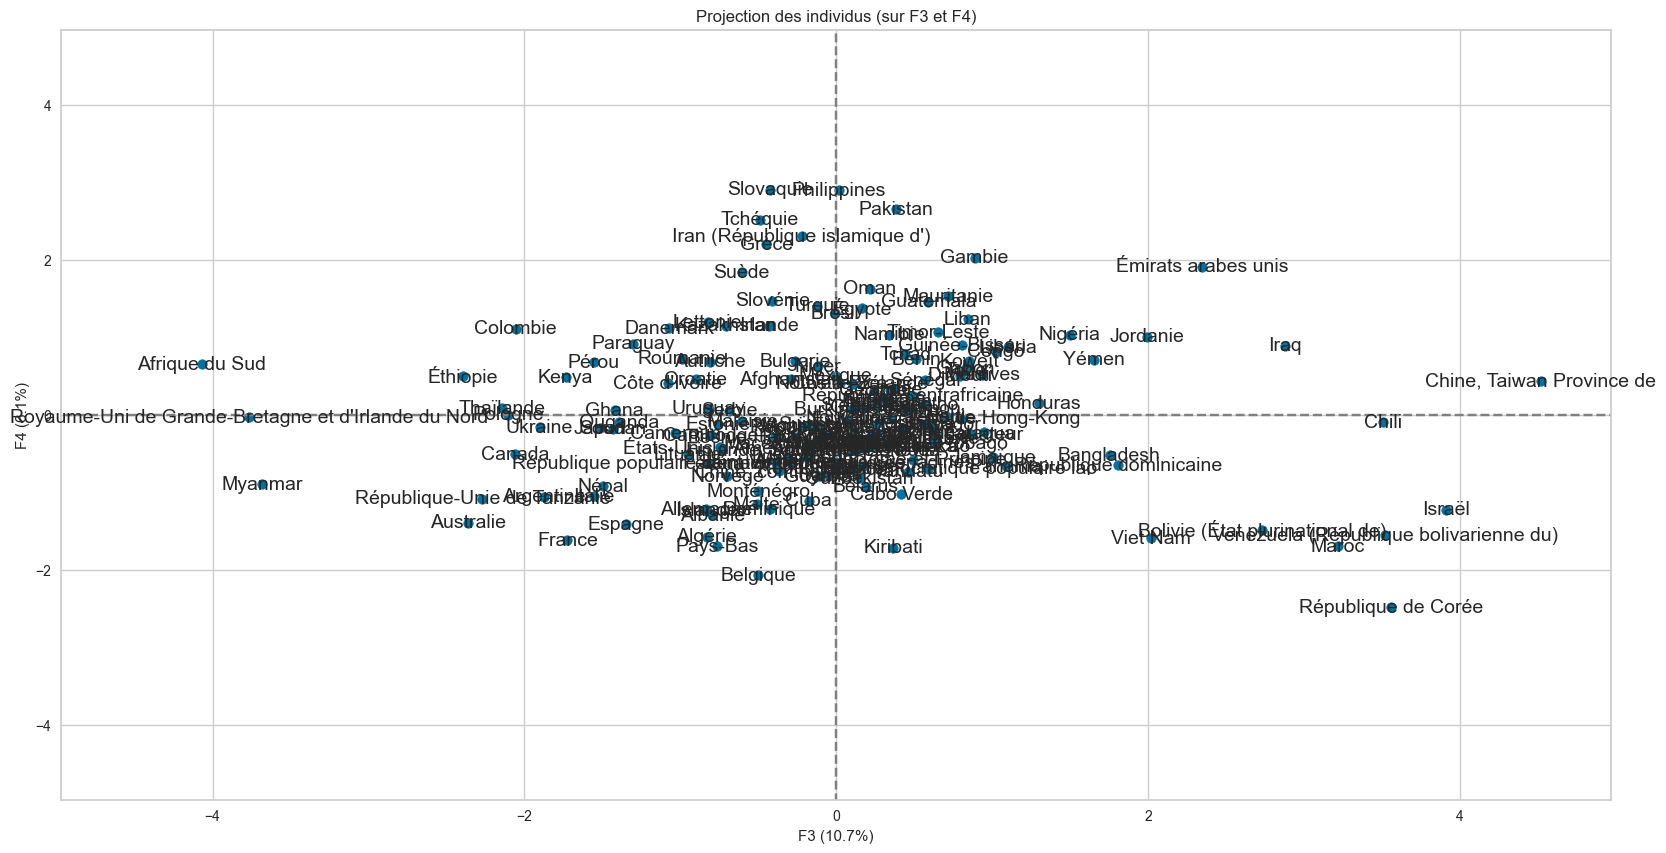

In [53]:
# Appel à la fonction sur les composantes 2 et 3
display_factorial_planes(Xk_projected, n_comp, pca, [(2,3)], labels = np.array(df_CAH.index))

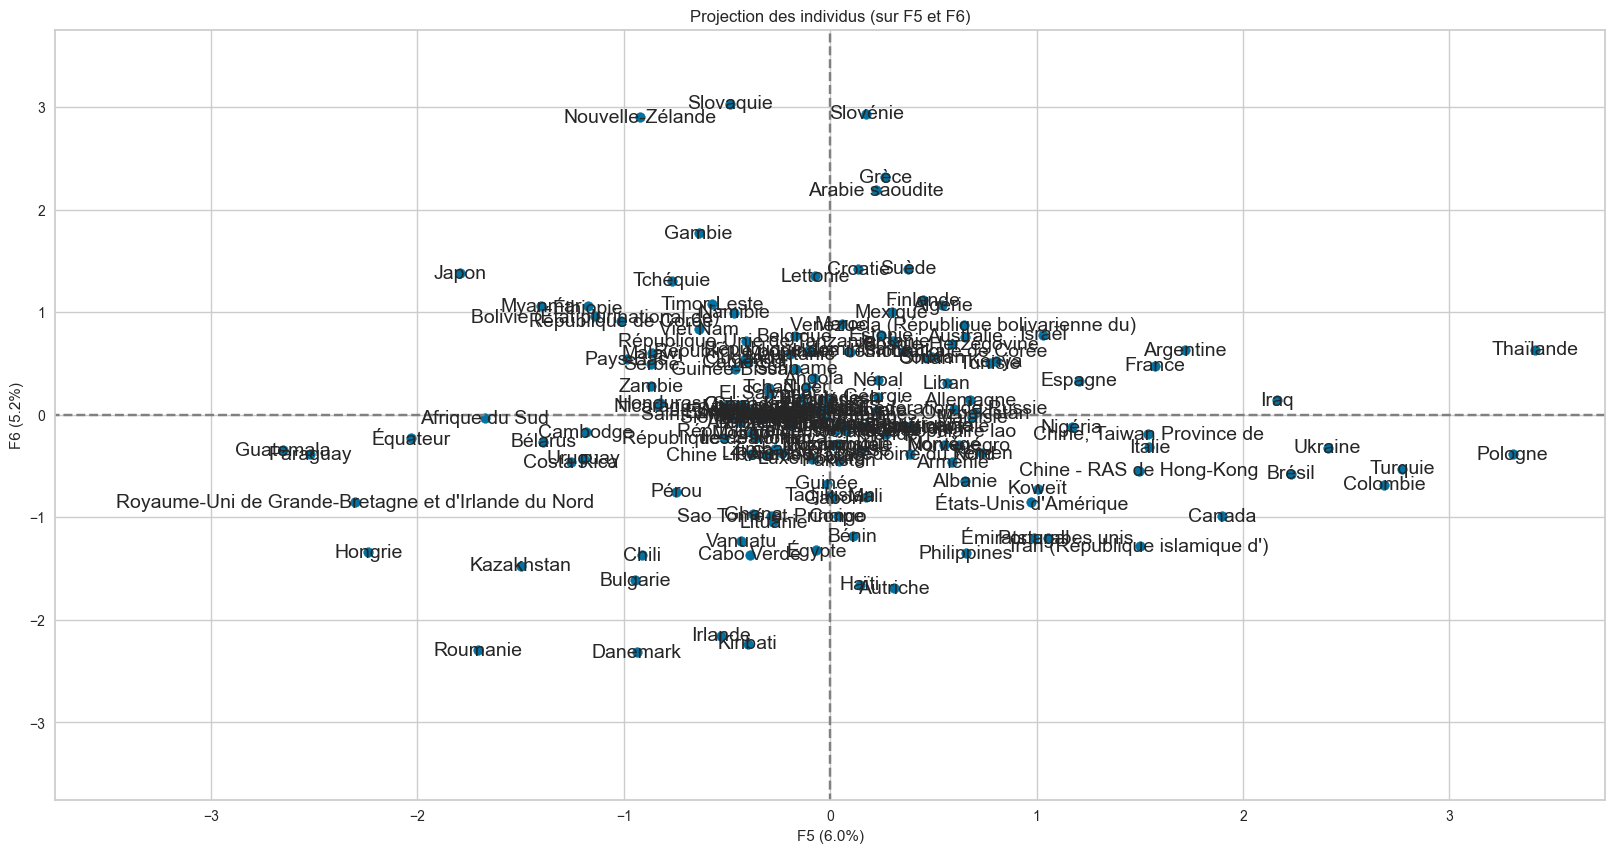

In [54]:
# Appel à la fonction sur les composantes 2 et 3
display_factorial_planes(Xk_projected, n_comp, pca, [(4,5)], labels = np.array(df_CAH.index))

* Nous allons créer le dataframe avec les valeurs des composantes principales.

In [55]:
# Projection des individues avec leurs contributions
X_proj = pd.DataFrame(Xk_projected, index = df_CAH.index, columns = ["F1", "F2", "F3", "F4", "F5","F6"])
X_proj[:10]

F1        F2        F3        F4        F5        F6
Zone                                                                          
Afghanistan        -0.400053  2.468592 -0.290197  0.458796  0.327159 -0.123249
Afrique du Sud      4.832081  2.695733 -4.070147  0.656220 -1.673864 -0.032984
Albanie            -1.297541 -2.043383 -0.794401 -1.293164  0.653813 -0.648456
Algérie             3.134025  2.395097 -0.831292 -1.572407  0.541659  1.066739
Allemagne          -0.230168 -2.135095 -0.835596 -1.217080  0.678968  0.139619
Angola              1.719661  2.630467  0.435267 -0.200916 -0.080360  0.353910
Antigua-et-Barbuda -2.532754 -0.699601  0.124714 -0.454974 -0.192144 -0.070208
Arabie saoudite     1.952286  0.635359  0.256513 -0.222001  0.220196  2.186577
Argentine           0.978712  0.801938 -1.876118 -1.058673  1.719254  0.628518
Arménie            -1.443329 -0.874863 -0.301861 -0.599436  0.590832 -0.462094

* Pour mieux identifier les groupes d'individus , nous allons se baser sur l'algorithme Kmeans (avec les clusters)
* Maintenant il reste à placer les clusters dans les nuages de points.

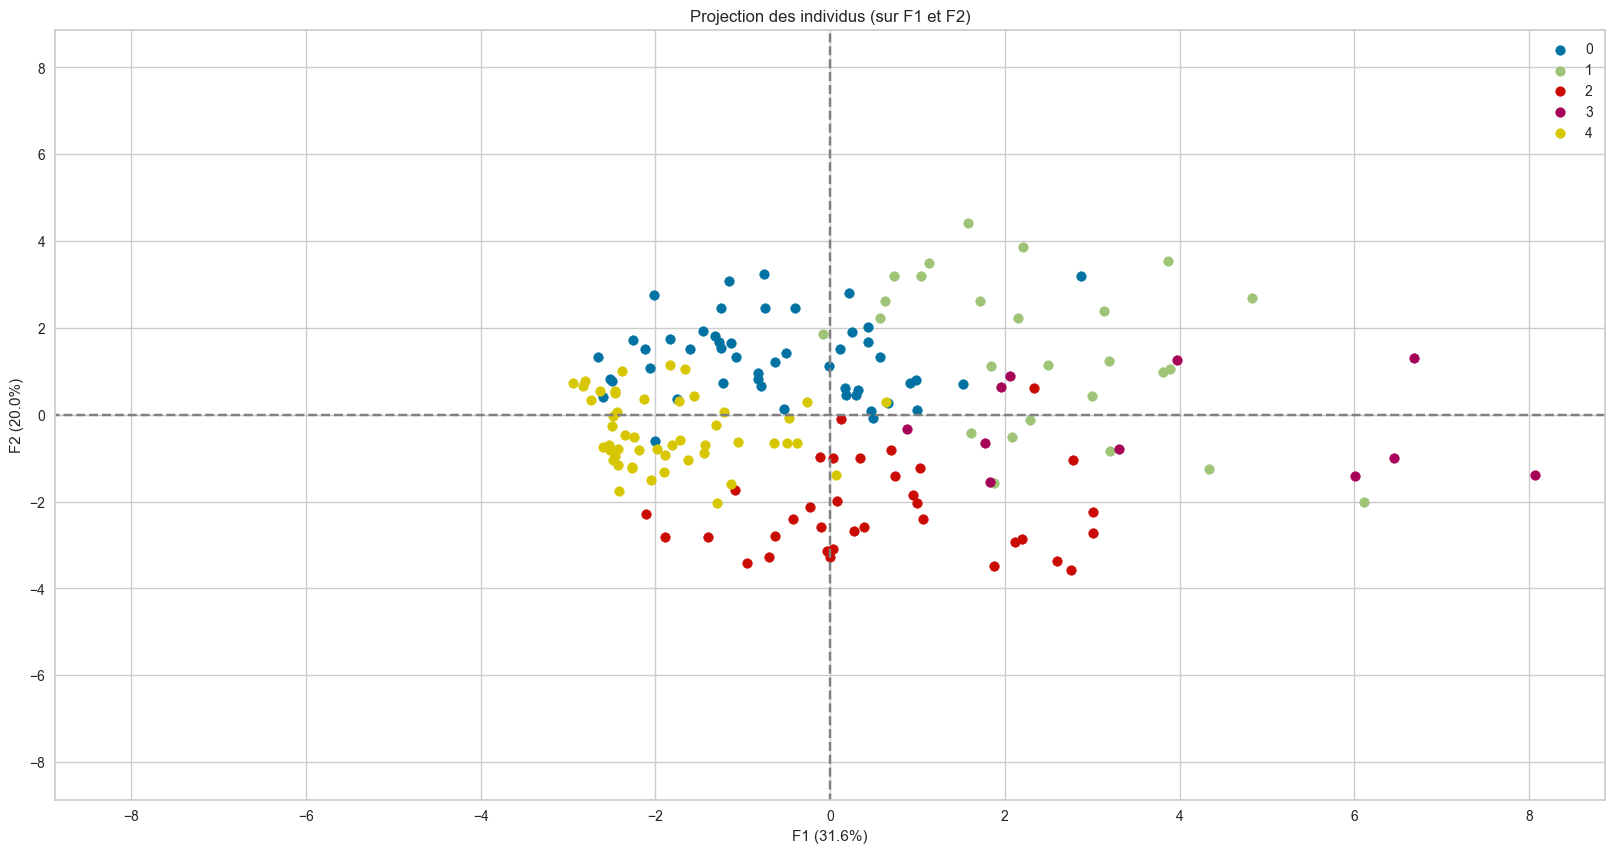

In [56]:
# Visualisation des individus 
# labels = np.array(df.index)
display_factorial_planes(Xk_projected, n_comp, pca, [(0,1)], illustrative_var = agg_cluster.labels_)

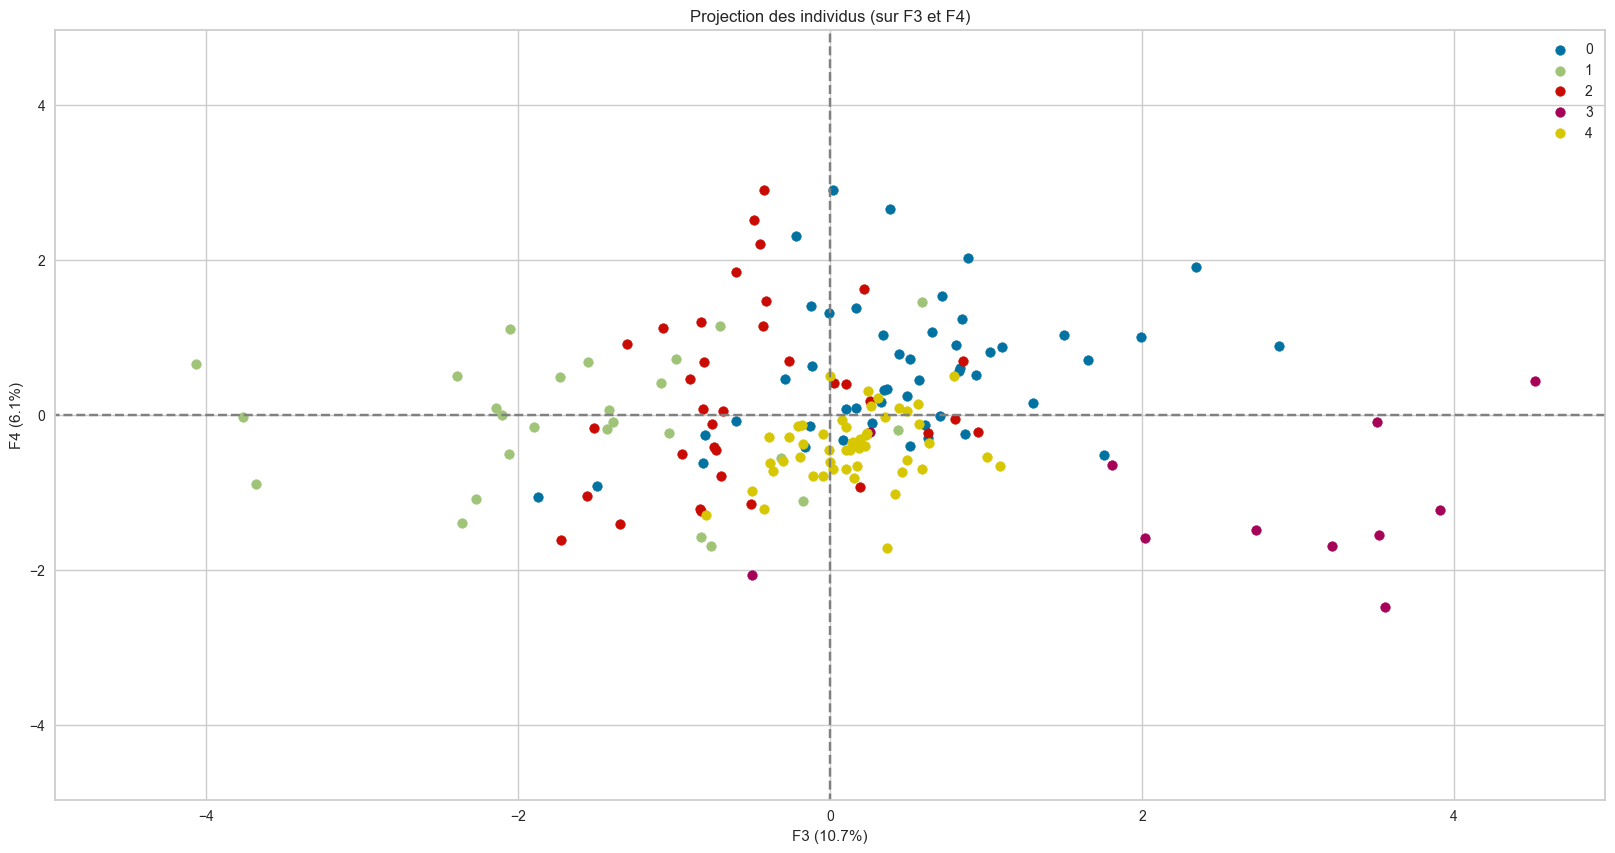

In [57]:
# Visualisation des individus
display_factorial_planes(Xk_projected, n_comp, pca, [(2,3)], illustrative_var = agg_cluster.labels_)

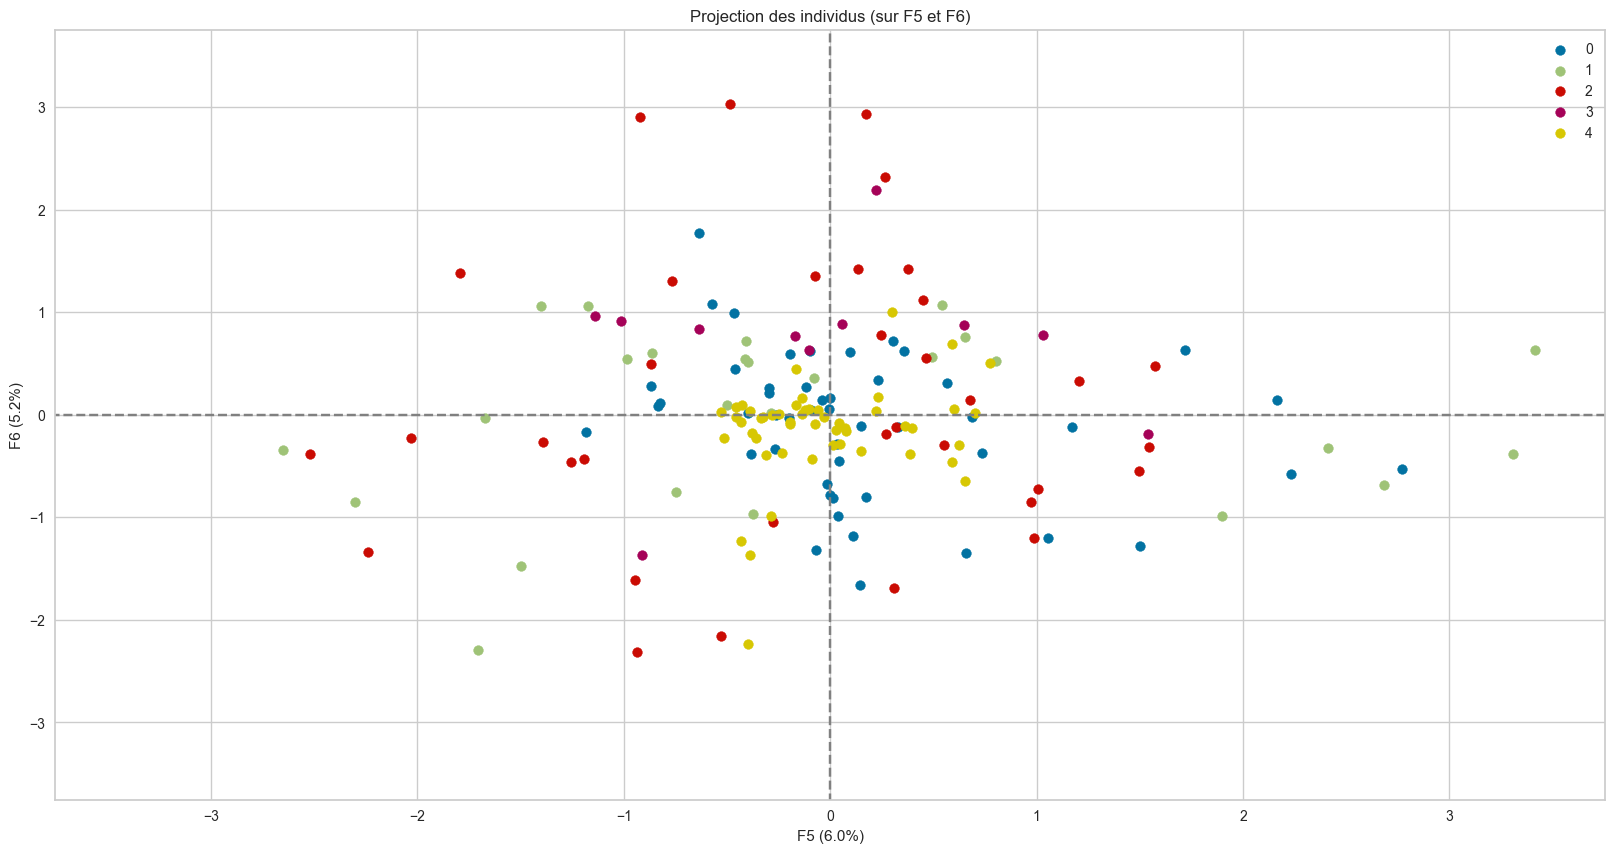

In [58]:
# Visualisation des individus 
display_factorial_planes(Xk_projected, n_comp, pca, [(4,5)], illustrative_var = agg_cluster.labels_)

### 3.4.2. Matrice des corrélations avec CAH

* Nous allons faire une matrice de corrélation pour visualiser les relations qui existent entre les clusters et les varibles;
* Pour celà nous allons les visualiser avec la matrix de corrélation.

In [59]:
# définir "Cluster_CAH" comme index
df_agg_label = df_agg.set_index("Cluster_CAH")
df_agg_label

Consommation-Personnelle (kg/pers/an)  Production-Totale  \
Cluster_CAH                                                             
0                                        -0.823697          -0.274856   
1                                         0.114387           1.512494   
2                                         0.876761           0.110550   
3                                         0.106607           0.437003   
4                                         0.108388          -0.677121   

             Importations-Totale  Exportations-Totale  Consommation-Totale  \
Cluster_CAH                                                                  
0                       0.172655            -0.276285            -0.110244   
1                       0.481963             0.477959             1.757441   
2                       0.166122             0.806184            -0.304180   
3                       0.514424             0.039270             0.434098   
4                      -0.636551            -0.539949            -0.674908   

             Disponibilité-Intérieure-Totale  Production-Poulet  \
Cluster_CAH                                                       
0                                  -0.210315          -0.261065   
1                                   1.544716          -0.075451   
2                                  -0.148148           0.096266   
3                                   0.973208           3.193273   
4                                  -0.693673          -0.465518   

             Importations-Poulet  Exportations-Poulet  Consommation-Poulet  \
Cluster_CAH                                                                  
0                      -0.181975            -0.235215            -0.143307   
1                       0.359544            -0.202807             0.272715   
2                       0.427341             0.903266             0.048744   
3                       0.487196             0.184288             2.388226   
4                      -0.406812            -0.330254            -0.549903   

             Disponibilité-Intérieure-Poulet  Nbre habitant  \
Cluster_CAH                                                   
0                                  -0.135094      -0.015099   
1                                   0.217638       1.375999   
2                                   0.046259      -0.193973   
3                                   2.450715       0.525776   
4                                  -0.541488      -0.667267   

             Évolution-pop (% en 2007-2017)  Stabilité-Politique  \
Cluster_CAH                                                        
0                                  0.790083            -0.726801   
1                                  0.209330            -0.487769   
2                                 -0.831356             0.872794   
3                                 -0.138439            -0.153353   
4                                 -0.265419             0.381066   

             PIB/habitant ($)  
Cluster_CAH                    
0                   -0.644508  
1                   -0.179676  
2                    1.273280  
3                    0.456654  
4                   -0.261481

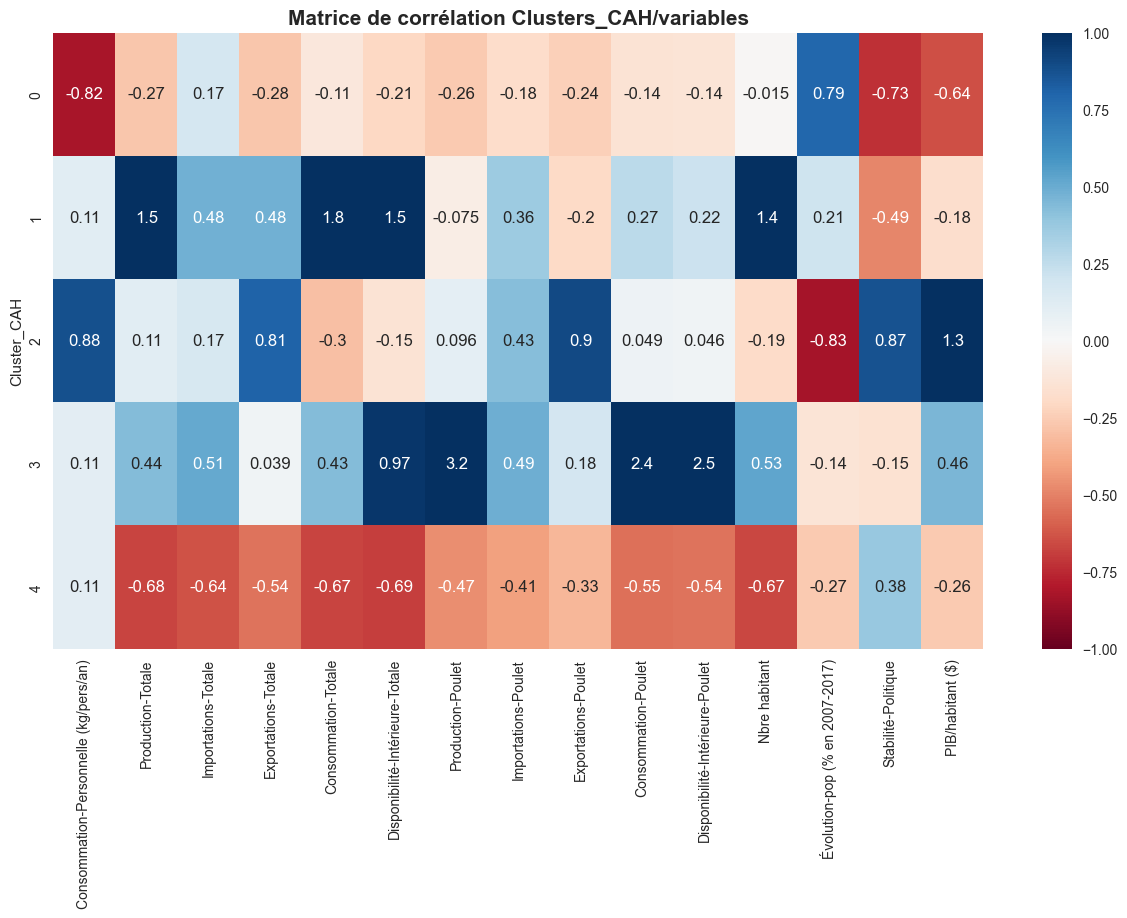

In [60]:
# Visualisation
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(df_agg_label,annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.title("Matrice de corrélation Clusters_CAH/variables", fontsize=15, fontweight="bold")
plt.show()

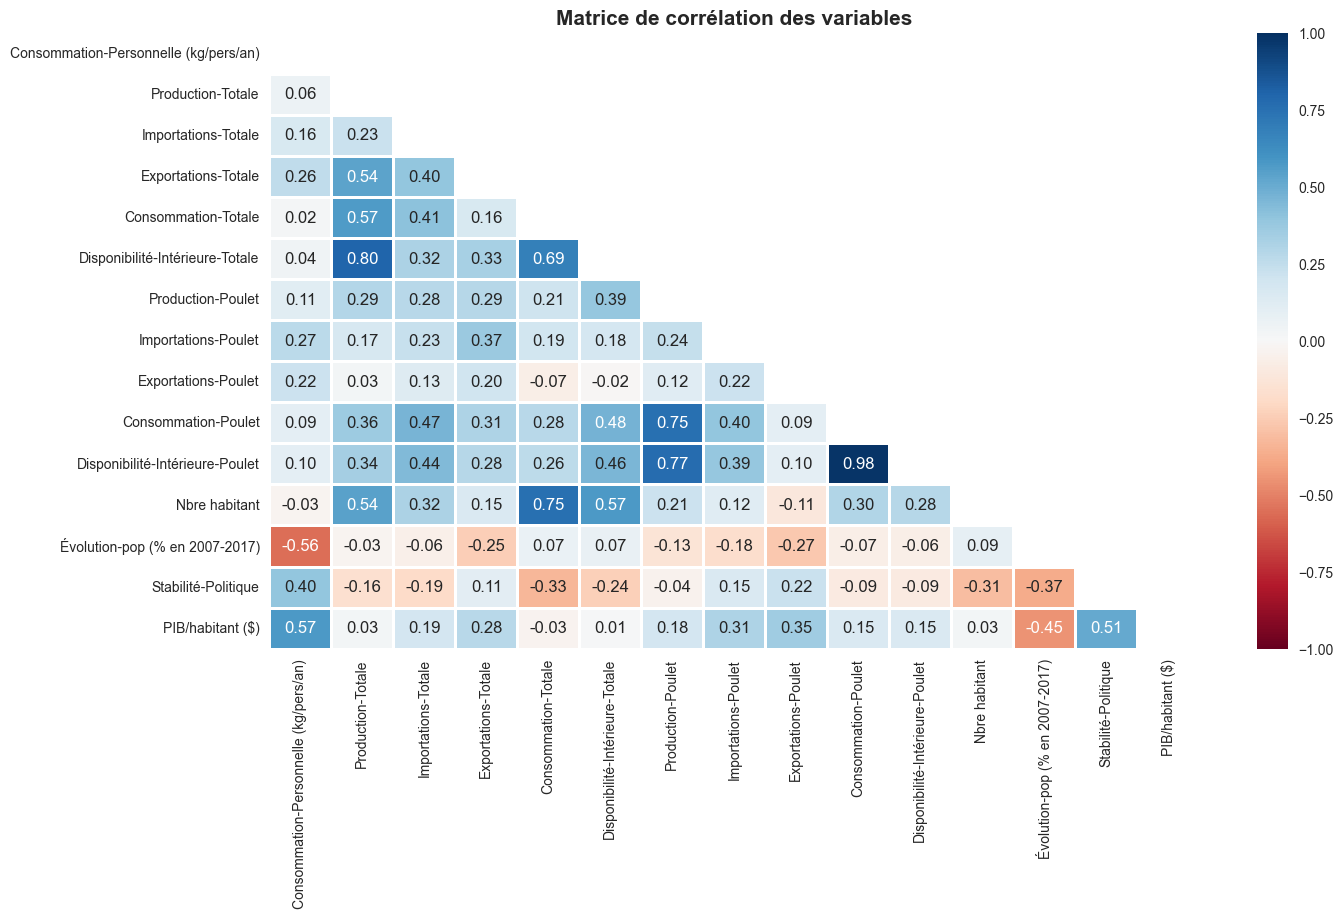

In [61]:
# Fonction pour visualiser la matix de corrélation
def plot_heatmap(data):
    cor_map = data.corr()
    #plt.rcParams.update({ "font.size" : 12})
    plt.figure(figsize = (15, 8))
    mask = np.triu(np.ones_like(cor_map, dtype=bool))
    sns.heatmap(cor_map, mask=mask, center=0, cmap='RdBu', 
                linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)
    plt.title("Matrice de corrélation des variables", fontsize=15, fontweight="bold")
    plt.show()

plot_heatmap(df_CAH)

### Interprétation corrélation avec la CAH

<div>
    <p><strong> Cluster0 :</strong> représente le pays plûtot stable à PIB plûtot élévé et une faible croissance démographique.</p>
    <p><strong> Cluster0 :</strong> représente les pays avec une forte évolution de la population.</p>
    <p><strong> Cluster1 :</strong> représente le pays plûtot stable à PIB plûtot élévé et une faible croissance démographique.</p>
    <p><strong> Cluster2 :</strong> Importations de vollaile plûtot moyennes et mauvaise croissance économique.</p>  
    <p><strong> Cluster3 :</strong> Importantes importations de vollaile et plûtot bonne croissance économique.</p>
    <p><strong> Cluster4 :</strong> Mauvaise croissance démographique et PIB bas </p>
</div>
<br>

### 3.4.3. Projection des individus avec K-means

In [62]:
# Appel aux paramètres de la fonction
index = df.index 
features = df.columns
# Nombre de  composantes
n_comp = 6

# Instanciation 
pca = PCA(n_components = 6).fit(X_scaled)
print(pca)

# Prédiction
pca_components = X_reduced = pca.fit_transform(X_scaled)

PCA(n_components=6)


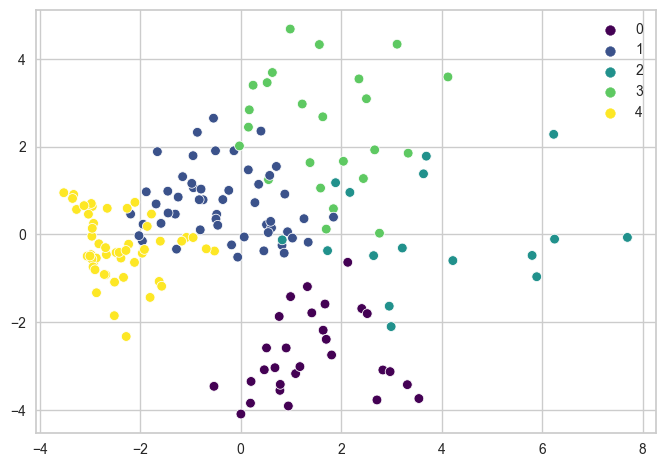

In [63]:
# Visualisation
sns.scatterplot(data = X_reduced, x = X_reduced[:, 0], y = X_reduced[:, 1], palette = 'viridis', alpha = 1, hue = clusters)
plt.legend()
plt.show()

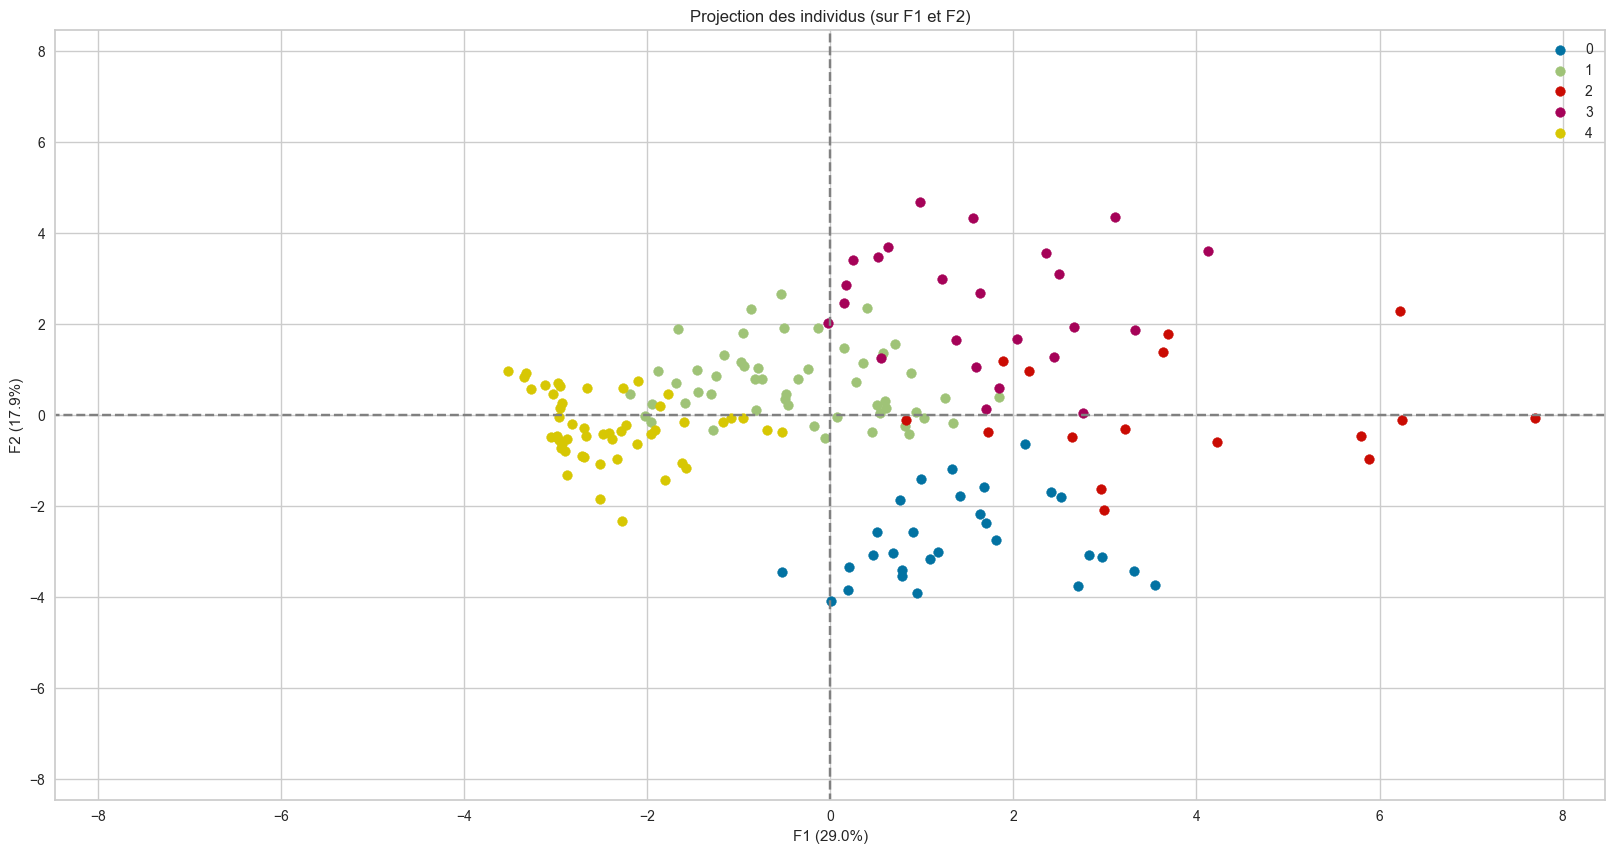

In [64]:
# Visualisation des individus 
display_factorial_planes(X_reduced, n_comp, pca, [(0,1)], illustrative_var = clusters)

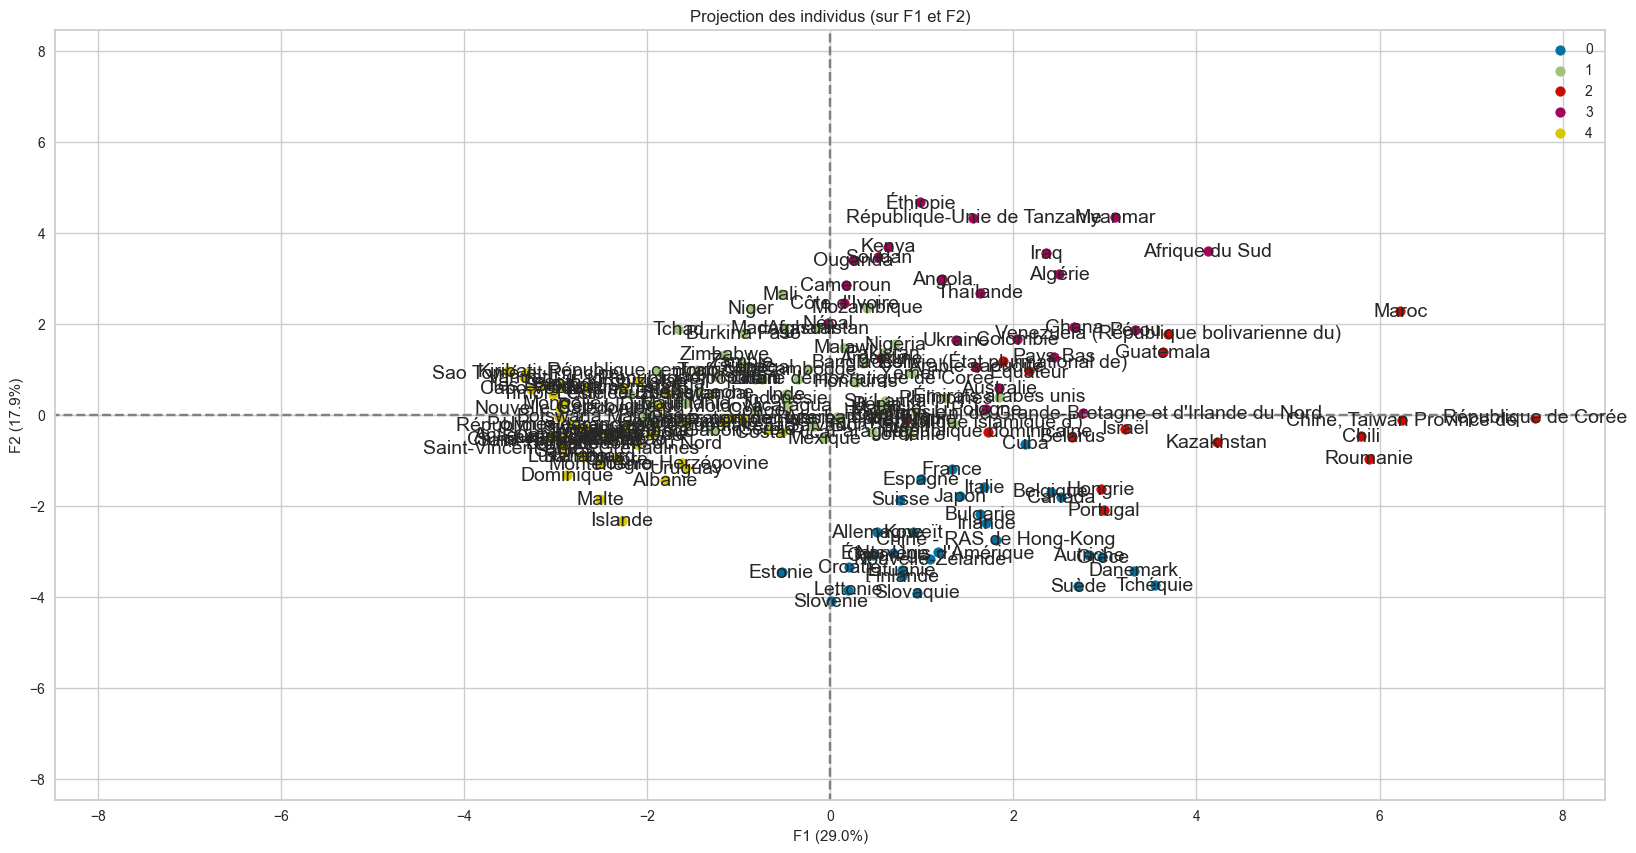

In [65]:
# Visualisation des individus 
display_factorial_planes(X_reduced, n_comp, pca, [(0,1)], illustrative_var = clusters, labels = np.array(df.index))

### 3.4.4. Matrice des corrélations avec K-means

In [66]:
# Définir "Cluster_Kmeans" comme index
df_kmeans_clusters_label = df_kmeans_clusters.set_index("Cluster_Kmeans")
df_kmeans_clusters_label

Consommation-Personnelle (kg/pers/an)  Production-Totale  \
Cluster_Kmeans                                                             
0                                            1.021092           0.075526   
1                                           -0.723242          -0.230481   
2                                            0.312331           0.932368   
3                                           -0.109437           1.256099   
4                                            0.110316          -0.691559   

                Importations-Totale  Exportations-Totale  Consommation-Totale  \
Cluster_Kmeans                                                                  
0                          0.258762             0.439372            -0.151463   
1                          0.091972            -0.227038            -0.188779   
2                          0.608764             1.112563             0.382298   
3                          0.571350             0.151339             1.907170   
4                         -0.700770            -0.438607            -0.738821   

                Disponibilité-Intérieure-Totale  Production-Poulet  \
Cluster_Kmeans                                                       
0                                     -0.102957          -0.019336   
1                                     -0.191163          -0.234236   
2                                      0.989241           2.505452   
3                                      1.465907          -0.073566   
4                                     -0.746733          -0.501581   

                Importations-Poulet  Exportations-Poulet  Consommation-Poulet  \
Cluster_Kmeans                                                                  
0                          0.716901             1.092391             0.041745   
1                         -0.215343            -0.246366            -0.200559   
2                          0.955027             0.077543             2.199104   
3                         -0.144425            -0.241889             0.169590   
4                         -0.419736            -0.280464            -0.588967   

                Disponibilité-Intérieure-Poulet  Nbre habitant  \
Cluster_Kmeans                                                   
0                                      0.047232      -0.056846   
1                                     -0.193056      -0.111064   
2                                      2.255304       0.309600   
3                                      0.089312       1.623344   
4                                     -0.579591      -0.715490   

                Évolution-pop (% en 2007-2017)  Stabilité-Politique  \
Cluster_Kmeans                                                        
0                                    -0.836469             0.930096   
1                                     0.778465            -0.715771   
2                                    -0.418251             0.020084   
3                                     0.334496            -0.749759   
4                                    -0.344284             0.547454   

                PIB/habitant ($)  
Cluster_Kmeans                    
0                       1.459884  
1                      -0.651178  
2                       0.187388  
3                      -0.209828  
4                      -0.126231

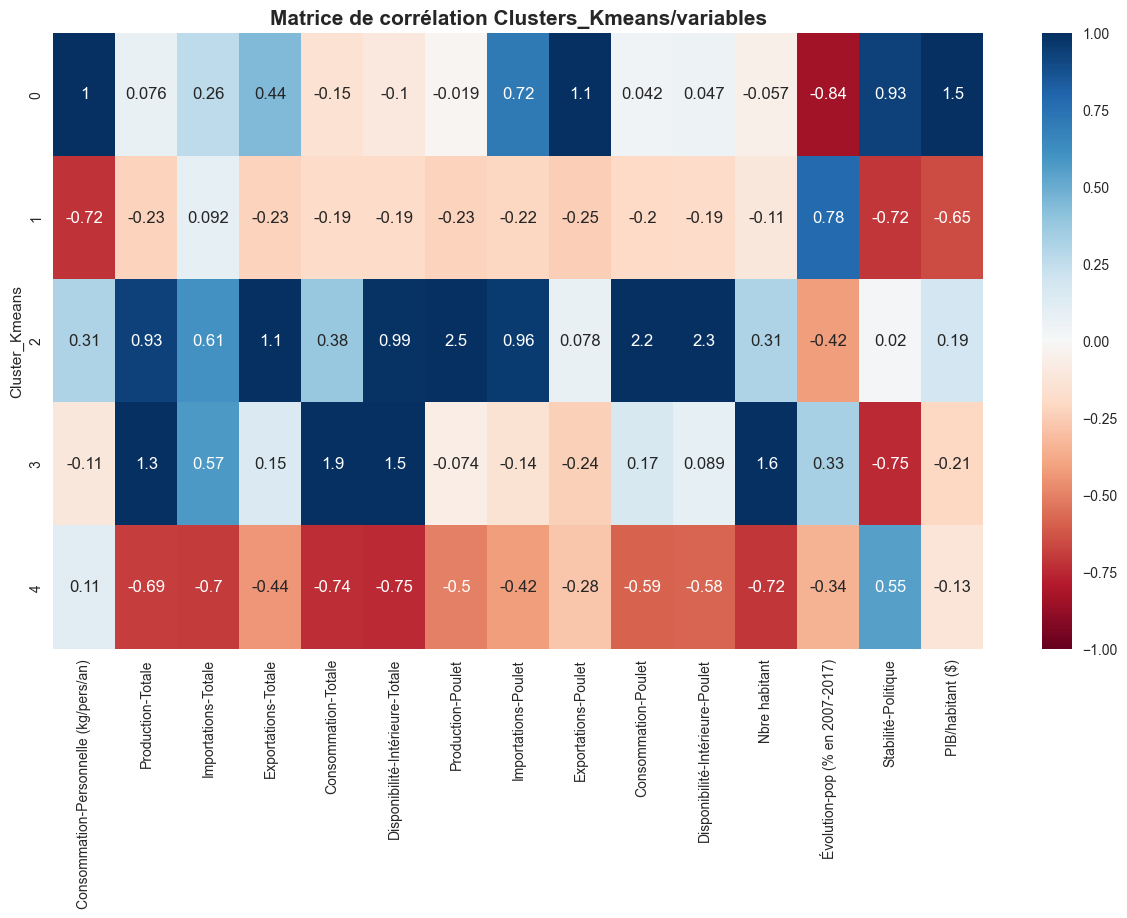

In [67]:
# Visualisation
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(df_kmeans_clusters_label,annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.title("Matrice de corrélation Clusters_Kmeans/variables", fontsize=15, fontweight="bold")
plt.show()

### 3.4.5. Tracé des coordonnées parallèles pour les centroïdes avec CAH

* Nous allons définir une fonction pour faire la visualisation de ces coordonnées.

In [68]:
from pandas.plotting import parallel_coordinates
palette = sns.color_palette("bright", 10)

# fonction pour tracer les coordonnées
def display_parallel_coordinates_centroids(df, num_clusters):
    '''Display a parallel coordinates plot for the centroids in df'''

    # Create the plot
    fig = plt.figure(figsize=(15, 8))
    title = fig.suptitle("Coordonnées parallèles pour les centroïdes", fontsize=18)
    fig.subplots_adjust(top=0.9, wspace=0)
    plt.xticks(fontsize = 13, rotation = 30)
    # Draw the chart
    parallel_coordinates(df, 'cluster', color=palette)

    # Stagger the axes
    ax=plt.gca()
    for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(20)    

In [69]:
# Ajouter le numéro de cluster aux données originales
df_CAH_centro = pd.DataFrame(X_scaled_CAH, columns = df_CAH.columns, index = df_CAH.index)
df_CAH_centro["cluster"] = agg_cluster.labels_

# grouper par Label avec la moyenne
df_agg_centro = df_CAH_centro.groupby("cluster").mean()
df_agg_centro

Consommation-Personnelle (kg/pers/an)  Production-Totale  \
cluster                                                             
0                                    -0.823697          -0.274856   
1                                     0.114387           1.512494   
2                                     0.876761           0.110550   
3                                     0.106607           0.437003   
4                                     0.108388          -0.677121   

         Importations-Totale  Exportations-Totale  Consommation-Totale  \
cluster                                                                  
0                   0.172655            -0.276285            -0.110244   
1                   0.481963             0.477959             1.757441   
2                   0.166122             0.806184            -0.304180   
3                   0.514424             0.039270             0.434098   
4                  -0.636551            -0.539949            -0.674908   

         Disponibilité-Intérieure-Totale  Production-Poulet  \
cluster                                                       
0                              -0.210315          -0.261065   
1                               1.544716          -0.075451   
2                              -0.148148           0.096266   
3                               0.973208           3.193273   
4                              -0.693673          -0.465518   

         Importations-Poulet  Exportations-Poulet  Consommation-Poulet  \
cluster                                                                  
0                  -0.181975            -0.235215            -0.143307   
1                   0.359544            -0.202807             0.272715   
2                   0.427341             0.903266             0.048744   
3                   0.487196             0.184288             2.388226   
4                  -0.406812            -0.330254            -0.549903   

         Disponibilité-Intérieure-Poulet  Nbre habitant  \
cluster                                                   
0                              -0.135094      -0.015099   
1                               0.217638       1.375999   
2                               0.046259      -0.193973   
3                               2.450715       0.525776   
4                              -0.541488      -0.667267   

         Évolution-pop (% en 2007-2017)  Stabilité-Politique  PIB/habitant ($)  
cluster                                                                         
0                              0.790083            -0.726801         -0.644508  
1                              0.209330            -0.487769         -0.179676  
2                             -0.831356             0.872794          1.273280  
3                             -0.138439            -0.153353          0.456654  
4                             -0.265419             0.381066         -0.261481

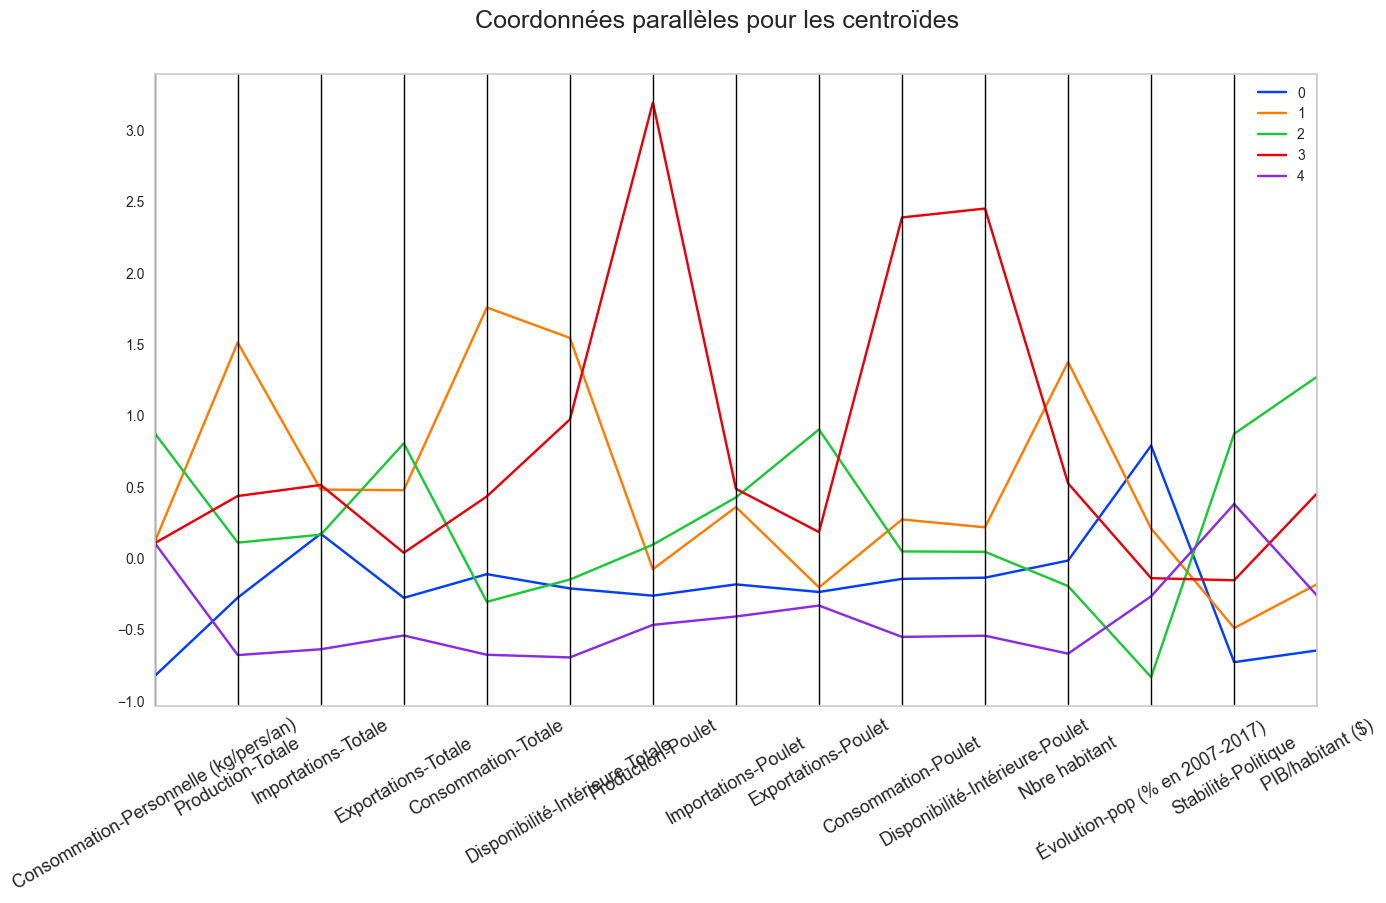

In [70]:
# Visualisation
display_parallel_coordinates_centroids(df_agg_centro.reset_index(), 5)

###  Interprétation

##### Cluster 2
* Les pays avec un taux d'importations, d'exportations de poulet élevé;
* Avec une une forte stabilité politique et un produit intérieur brut (PIb) élevé. 
##### Cluster 3
* Faible taux d'évolution de leur population;
* PIB faible avec une stabilité politique assez faible.

### 3.4.6. Tracé des coordonnées parallèles pour les centroïdes avec K-means

In [71]:
# Instancier le modèle de clustering
kmeans_zone = KMeans(n_clusters = 5, init = "k-means++", random_state = 42)

# Adapter (appliquer) aux données 
kmeans_zone.fit(X_scaled)
print(kmeans_zone.fit(X_scaled))

# afficher les clusters
# labels = Kmmeans(n_clusters = 4).fit(X_scaled).labels_
# créer un dataset avec les valeurs std
# new_df = pd.DataFrame(data = X_scaled, columns = df.columns)

# prédire sur les données entrainées
clusters = kmeans_zone.predict(X_scaled)

# créer un nouveau dataframe
df_kmeans_label = pd.DataFrame(X_scaled, columns = df.columns, index = df.index)

# ajouter une nouvelle colonne pour les différents clusters
df_kmeans_label["Cluster_Kmeans"] = clusters
df_kmeans_label.head(3)

KMeans(n_clusters=5, random_state=42)


Consommation-Personnelle (kg/pers/an)  Production-Totale  \
Zone                                                                       
Afghanistan                                 -1.675306          -0.095029   
Afrique du Sud                              -0.680356           3.771801   
Albanie                                      2.837875          -0.596902   

                Importations-Totale  Exportations-Totale  Consommation-Totale  \
Zone                                                                            
Afghanistan                0.339522            -0.460188             0.540710   
Afrique du Sud             1.530961             2.734954             2.611705   
Albanie                   -0.640046            -0.597338            -0.490150   

                Disponibilité-Intérieure-Totale  Production-Poulet  \
Zone                                                                 
Afghanistan                            0.106012          -0.491109   
Afrique du Sud                         3.676665          -0.239083   
Albanie                               -0.602580          -0.581118   

                Importations-Poulet  Exportations-Poulet  Consommation-Poulet  \
Zone                                                                            
Afghanistan               -0.054194            -0.570916            -0.457214   
Afrique du Sud            -0.360197            -0.187598            -0.162182   
Albanie                    0.157654            -0.339107            -0.510253   

                Disponibilité-Intérieure-Poulet  Nbre habitant  \
Zone                                                             
Afghanistan                           -0.452495       1.441812   
Afrique du Sud                        -0.169240       2.772896   
Albanie                               -0.518368      -0.705281   

                Évolution-pop (% en 2007-2017)  Stabilité-Politique  \
Zone                                                                  
Afghanistan                           1.483620             0.002029   
Afrique du Sud                        0.114821            -0.286850   
Albanie                              -1.493729             0.507568   

                PIB/habitant ($)  Cluster_Kmeans  
Zone                                              
Afghanistan            -1.004048               4  
Afrique du Sud         -0.232015               2  
Albanie                -0.308831               1

In [72]:
# créer un nouveau dataframe
df_kmeans_centro = pd.DataFrame(X_scaled, columns = df.columns, index = df.index)
# ajouter une nouvelle colonne pour les différents clusters
df_kmeans_centro["cluster"] = clusters

# grouper par cluster avec la moyenne
df_kmeans_centro = df_kmeans_centro.groupby("cluster").mean()
df_kmeans_centro

Consommation-Personnelle (kg/pers/an)  Production-Totale  \
cluster                                                             
0                                     0.201666           0.852422   
1                                     0.110316          -0.691559   
2                                    -0.045979           1.329264   
3                                     1.021092           0.075526   
4                                    -0.723242          -0.230481   

         Importations-Totale  Exportations-Totale  Consommation-Totale  \
cluster                                                                  
0                   0.694608             1.011890             0.399741   
1                  -0.700770            -0.438607            -0.738821   
2                   0.506274             0.183957             1.960576   
3                   0.258762             0.439372            -0.151463   
4                   0.091972            -0.227038            -0.188779   

         Disponibilité-Intérieure-Totale  Production-Poulet  \
cluster                                                       
0                               0.947618           2.353186   
1                              -0.746733          -0.501581   
2                               1.517397          -0.073153   
3                              -0.102957          -0.019336   
4                              -0.191163          -0.234236   

         Importations-Poulet  Exportations-Poulet  Consommation-Poulet  \
cluster                                                                  
0                   0.877661             0.053034             2.240188   
1                  -0.419736            -0.280464            -0.588967   
2                  -0.135044            -0.237662             0.050984   
3                   0.716901             1.092391             0.041745   
4                  -0.215343            -0.246366            -0.200559   

         Disponibilité-Intérieure-Poulet  Nbre habitant  \
cluster                                                   
0                               2.293254       0.380951   
1                              -0.579591      -0.715490   
2                              -0.032912       1.627726   
3                               0.047232      -0.056846   
4                              -0.193056      -0.111064   

         Évolution-pop (% en 2007-2017)  Stabilité-Politique  PIB/habitant ($)  
cluster                                                                         
0                             -0.303627            -0.141702          0.147495  
1                             -0.344284             0.547454         -0.126231  
2                              0.282503            -0.663649         -0.197611  
3                             -0.836469             0.930096          1.459884  
4                              0.778465            -0.715771         -0.651178

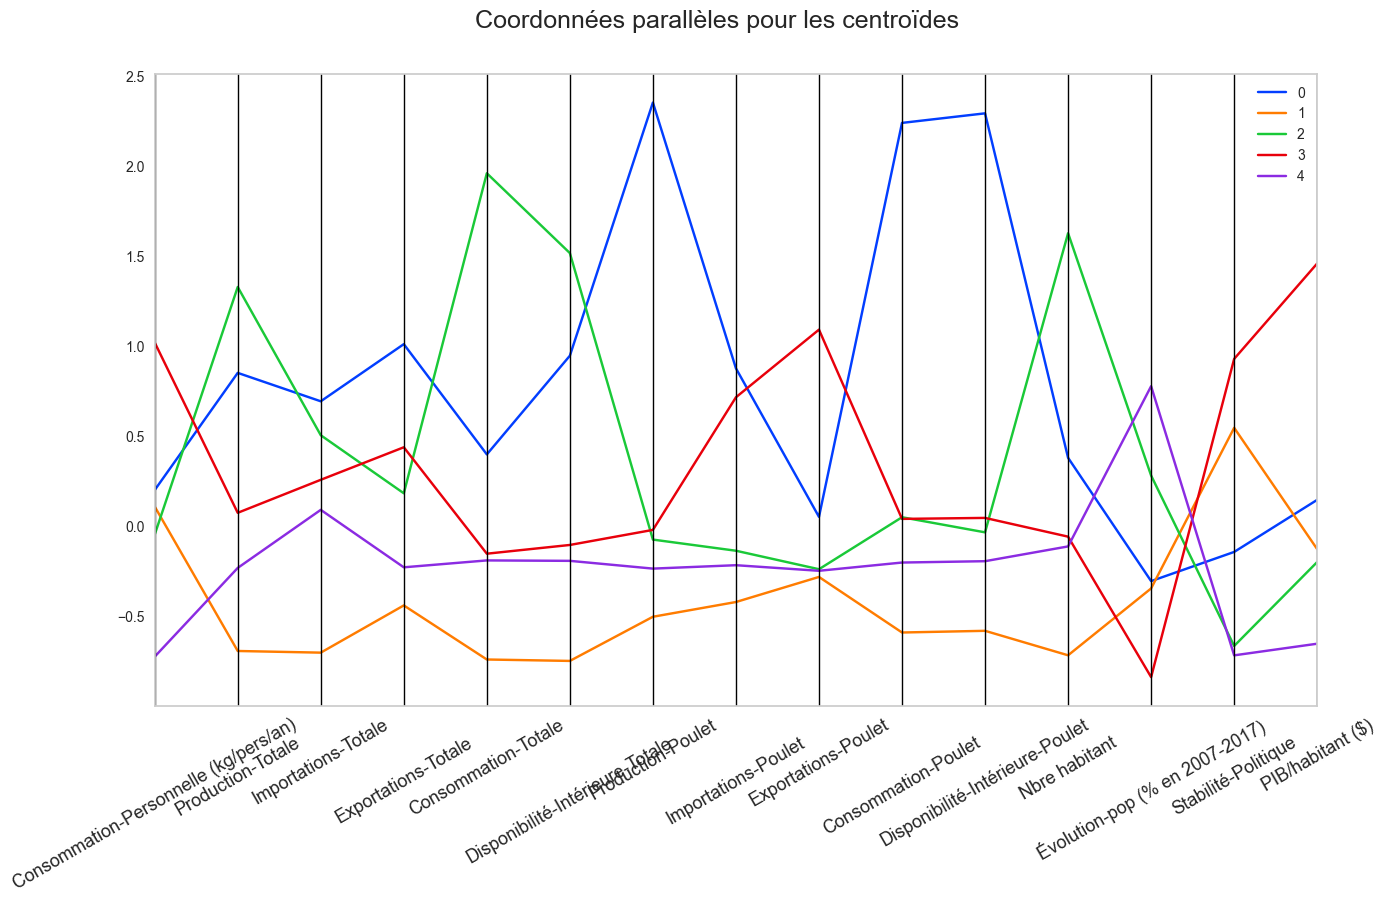

In [73]:
# Visualisation
display_parallel_coordinates_centroids(df_kmeans_centro.reset_index(), 5)

### Interprétation

##### Cluster 0
* Les pays avec un taux d'importations, d'exportations de poulet élevé;
* Avec une une forte stabilité politique et un produit intérieur brut (PIb) élevé. 
##### Cluster 1
* Forte taux d'évolution de leur population;
* PIB faible avec une stabilité politique assez faible.
##### Cluster 3
* Une forte taux d'importations et consommation de poulet;
* Stabilité politique et un PIB faible. 

## 3.5. K-Means après réduction de dimenssions

In [74]:
# Appel aux paramètres de la fonction
index = df.index 
features = df.columns
# Nombre de  composantes
n_comp = 6

# Instanciation 
pca = PCA(n_components = 6).fit(X_scaled)
print(pca)

# Prédiction
pca_components = X_reduced = pca.fit_transform(X_scaled)

# Nombre de composantes calculées
pcs = pca.components_

# Instanciation du modèle
kmeans_zone = KMeans(n_clusters = 5, init = "k-means++", random_state = 42)
print(kmeans_zone)

# Prédiction
Xkmeans_projected = label = kmeans_zone.fit_predict(pca_components)

# les centroides
centroids = kmeans_zone.cluster_centers_
u_labels = np.unique(label)

# créer un nouveau dataframe
df_kmeans_PCA = pd.DataFrame(X_scaled, columns = df.columns, index = df.index)

# ajouter une nouvelle colonne pour les différents clusters
df_kmeans_PCA["Cluster_Kmeans_PCA"] = Xkmeans_projected
# grouper par cluster avec la moyenne
df_kmeans_PCA  = df_kmeans_PCA.groupby("Cluster_Kmeans_PCA").mean().reset_index()
df_kmeans_PCA 

PCA(n_components=6)
KMeans(n_clusters=5, random_state=42)


Cluster_Kmeans_PCA  Consommation-Personnelle (kg/pers/an)  \
0                   0                               1.021092   
1                   1                               0.110316   
2                   2                              -0.723242   
3                   3                               0.201666   
4                   4                              -0.045979   

   Production-Totale  Importations-Totale  Exportations-Totale  \
0           0.075526             0.258762             0.439372   
1          -0.691559            -0.700770            -0.438607   
2          -0.230481             0.091972            -0.227038   
3           0.852422             0.694608             1.011890   
4           1.329264             0.506274             0.183957   

   Consommation-Totale  Disponibilité-Intérieure-Totale  Production-Poulet  \
0            -0.151463                        -0.102957          -0.019336   
1            -0.738821                        -0.746733          -0.501581   
2            -0.188779                        -0.191163          -0.234236   
3             0.399741                         0.947618           2.353186   
4             1.960576                         1.517397          -0.073153   

   Importations-Poulet  Exportations-Poulet  Consommation-Poulet  \
0             0.716901             1.092391             0.041745   
1            -0.419736            -0.280464            -0.588967   
2            -0.215343            -0.246366            -0.200559   
3             0.877661             0.053034             2.240188   
4            -0.135044            -0.237662             0.050984   

   Disponibilité-Intérieure-Poulet  Nbre habitant  \
0                         0.047232      -0.056846   
1                        -0.579591      -0.715490   
2                        -0.193056      -0.111064   
3                         2.293254       0.380951   
4                        -0.032912       1.627726   

   Évolution-pop (% en 2007-2017)  Stabilité-Politique  PIB/habitant ($)  
0                       -0.836469             0.930096          1.459884  
1                       -0.344284             0.547454         -0.126231  
2                        0.778465            -0.715771         -0.651178  
3                       -0.303627            -0.141702          0.147495  
4                        0.282503            -0.663649         -0.197611

In [75]:
df_kmeans_clusters

Cluster_Kmeans  Consommation-Personnelle (kg/pers/an)  Production-Totale  \
0               0                               1.021092           0.075526   
1               1                              -0.723242          -0.230481   
2               2                               0.312331           0.932368   
3               3                              -0.109437           1.256099   
4               4                               0.110316          -0.691559   

   Importations-Totale  Exportations-Totale  Consommation-Totale  \
0             0.258762             0.439372            -0.151463   
1             0.091972            -0.227038            -0.188779   
2             0.608764             1.112563             0.382298   
3             0.571350             0.151339             1.907170   
4            -0.700770            -0.438607            -0.738821   

   Disponibilité-Intérieure-Totale  Production-Poulet  Importations-Poulet  \
0                        -0.102957          -0.019336             0.716901   
1                        -0.191163          -0.234236            -0.215343   
2                         0.989241           2.505452             0.955027   
3                         1.465907          -0.073566            -0.144425   
4                        -0.746733          -0.501581            -0.419736   

   Exportations-Poulet  Consommation-Poulet  Disponibilité-Intérieure-Poulet  \
0             1.092391             0.041745                         0.047232   
1            -0.246366            -0.200559                        -0.193056   
2             0.077543             2.199104                         2.255304   
3            -0.241889             0.169590                         0.089312   
4            -0.280464            -0.588967                        -0.579591   

   Nbre habitant  Évolution-pop (% en 2007-2017)  Stabilité-Politique  \
0      -0.056846                       -0.836469             0.930096   
1      -0.111064                        0.778465            -0.715771   
2       0.309600                       -0.418251             0.020084   
3       1.623344                        0.334496            -0.749759   
4      -0.715490                       -0.344284             0.547454   

   PIB/habitant ($)  
0          1.459884  
1         -0.651178  
2          0.187388  
3         -0.209828  
4         -0.126231

### Tracé des centroides sur le plan factoriel

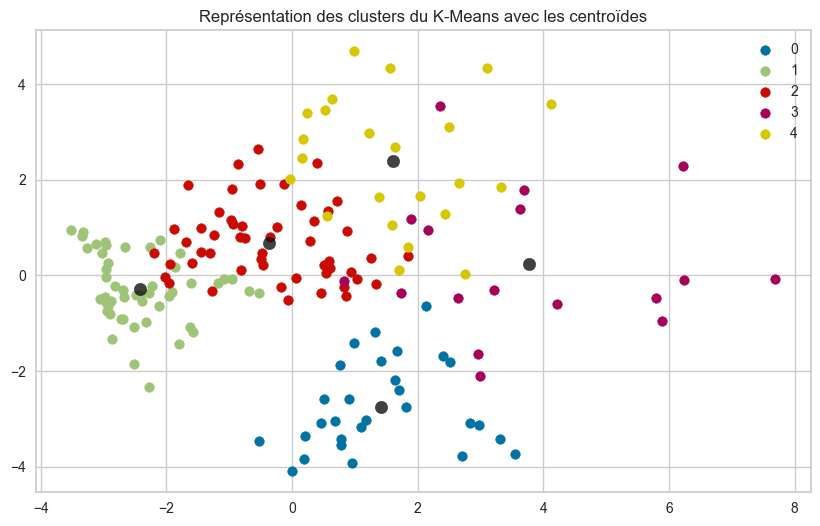

In [76]:
plt.figure(figsize=(10,6))
#display_factorial_planes(X_reduced, n_comp, pca, [(0,1)], illustrative_var = clusters)
for i in u_labels:
    plt.scatter(pca_components[label == i , 0] , pca_components[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, alpha = 0.8, color = 'k')
plt.legend()
plt.title('Représentation des clusters du K-Means avec les centroïdes')
plt.show()

In [77]:
#display_factorial_planes(X_reduced, n_comp, pca, [(0,1)], illustrative_var = clusters)

# 4. Comparaison des deux méthodes

In [78]:
# La taille des clusters avec la CAH
taille_CAH = cluster_CAH.copy()
print("Nbre de clusters avec la CAH:\n", taille_CAH)

Nbre de clusters avec la CAH:
 4    51
0    49
2    35
1    26
3    11
Name: Cluster_CAH, dtype: int64


In [79]:
# La taille des clusters avec le K-means
taille_kmeans = cluster_kmeans.copy()
print("Nbre de clusters avec le K-means:\n", taille_kmeans)

Nbre de clusters avec le K-means:
 1    52
4    51
0    29
3    24
2    16
Name: Cluster_Kmeans, dtype: int64


* Nous constatons que les clusters ont des tailles différentes.

# 5. Recommandations

### 5.1. Le Top des pays à recommandés avec la CAH

In [80]:
# Dataframe des top 10 avec la CAH
#Top_10_CAH = df_CAH_label[df_CAH_label["Cluster_CAH"] == 2].sort_values(by= "Importations-Poulet", ascending = False).head(10)
Top_10_CAH = df_CAH_label[df_CAH_label["Cluster_CAH"] == 2].head(10)
Top_10_CAH

Consommation-Personnelle (kg/pers/an)  \
Zone                                                              
Allemagne                                              1.252580   
Autriche                                               1.194565   
Bulgarie                                               0.174180   
Bélarus                                                1.397393   
Chine - RAS de Hong-Kong                               0.417033   
Costa Rica                                             0.002683   
Croatie                                                1.630353   
Danemark                                               1.346524   
Espagne                                                1.224497   
Estonie                                                1.698561   

                          Production-Totale  Importations-Totale  \
Zone                                                               
Allemagne                         -0.155773            -0.164805   
Autriche                           0.310456             1.655042   
Bulgarie                           0.243997            -0.029517   
Bélarus                            1.403176             0.153535   
Chine - RAS de Hong-Kong          -0.854505             1.698270   
Costa Rica                         0.155023            -0.163737   
Croatie                           -0.359366            -0.148527   
Danemark                           0.895861             1.041044   
Espagne                           -0.155773            -0.164805   
Estonie                           -0.686692            -0.624302   

                          Exportations-Totale  Consommation-Totale  \
Zone                                                                 
Allemagne                           -0.382675            -0.212866   
Autriche                             1.765656             0.016061   
Bulgarie                             1.985404            -0.320456   
Bélarus                              1.666106             0.123375   
Chine - RAS de Hong-Kong             0.466887            -0.264922   
Costa Rica                           1.639292            -0.512232   
Croatie                              0.126015            -0.420484   
Danemark                             3.232394            -0.282146   
Espagne                             -0.382675            -0.212866   
Estonie                             -0.067537            -0.740772   

                          Disponibilité-Intérieure-Totale  Production-Poulet  \
Zone                                                                           
Allemagne                                       -0.115164          -0.239083   
Autriche                                         0.386755           0.228966   
Bulgarie                                        -0.220106          -0.017060   
Bélarus                                          1.063785           2.119162   
Chine - RAS de Hong-Kong                        -0.501333          -0.515112   
Costa Rica                                      -0.218034           0.138956   
Croatie                                         -0.402503          -0.293089   
Danemark                                         0.446564           0.378981   
Espagne                                         -0.115164          -0.239083   
Estonie                                         -0.800930          -0.539114   

                          Importations-Poulet  Exportations-Poulet  \
Zone                                                                 
Allemagne                           -0.360197            -0.187598   
Autriche                             1.852440            -0.187598   
Bulgarie                             1.805362            -0.187598   
Bélarus                             -0.242503            -0.187598   
Chine - RAS de Hong-Kong            -0.360197            -0.187598   
Costa Rica                          -0.336658             0.115420   
Croatie                             -0.171

### 5.2. Le Top des pays à recommandés avec le K-means

In [84]:
# Dataframe des top 10 avec le Kmeans
#Top_10_Kmeans = df_kmeans_label[df_kmeans_label["Cluster_Kmeans"] == 2].sort_values(by="Importations-Poulet", ascending = False).head(10)
Top_10_Kmeans = df_kmeans_label[df_kmeans_label["Cluster_Kmeans"] == 3].head(10)
Top_10_Kmeans

Consommation-Personnelle (kg/pers/an)  \
Zone                                                              
Allemagne                                              1.252580   
Autriche                                               1.194565   
Belgique                                               1.614862   
Bulgarie                                               0.174180   
Canada                                                 1.155738   
Chine - RAS de Hong-Kong                               0.417033   
Croatie                                                1.630353   
Cuba                                                   0.759777   
Danemark                                               1.346524   
Espagne                                                1.224497   

                          Production-Totale  Importations-Totale  \
Zone                                                               
Allemagne                         -0.155773            -0.164805   
Autriche                           0.310456             1.655042   
Belgique                           1.003405            -0.164805   
Bulgarie                           0.243997            -0.029517   
Canada                            -0.155773            -0.164805   
Chine - RAS de Hong-Kong          -0.854505             1.698270   
Croatie                           -0.359366            -0.148527   
Cuba                               1.201352             0.346727   
Danemark                           0.895861             1.041044   
Espagne                           -0.155773            -0.164805   

                          Exportations-Totale  Consommation-Totale  \
Zone                                                                 
Allemagne                           -0.382675            -0.212866   
Autriche                             1.765656             0.016061   
Belgique                            -0.382675             0.390006   
Bulgarie                             1.985404            -0.320456   
Canada                              -0.382675             2.856696   
Chine - RAS de Hong-Kong             0.466887            -0.264922   
Croatie                              0.126015            -0.420484   
Cuba                                -0.267252             0.166103   
Danemark                             3.232394            -0.282146   
Espagne                             -0.382675            -0.212866   

                          Disponibilité-Intérieure-Totale  Production-Poulet  \
Zone                                                                           
Allemagne                                       -0.115164          -0.239083   
Autriche                                         0.386755           0.228966   
Belgique                                         1.285755           2.119162   
Bulgarie                                        -0.220106          -0.017060   
Canada                                          -0.115164          -0.239083   
Chine - RAS de Hong-Kong                        -0.501333          -0.515112   
Croatie                                         -0.402503          -0.293089   
Cuba                                             1.379957          -0.485109   
Danemark                                         0.446564           0.378981   
Espagne                                         -0.115164          -0.239083   

                          Importations-Poulet  Exportations-Poulet  \
Zone                                                                 
Allemagne                           -0.360197            -0.187598   
Autriche                             1.852440            -0.187598   
Belgique                            -0.360197            -0.187598   
Bulgarie                             1.805362            -0.187598   
Canada                               3.547225            -0.187598   
Chine - RAS de Hong-Kong            -0.360197            -0.187598   
Croatie                             -0.171

Sources : 
* https://stacklima.com/determination-du-nombre-de-clusters-dans-l-exploration-de-donnees/
* https://www.scikit-yb.org/en/latest/api/cluster/index.html
* https://www.youtube.com/watch?v=H_AW_lwvdDk
* https://datascientest.com/dendrogramme